# Term Project: FIN6525

by [Daniel Cárdenas [6102358]](https://danielcs88.github.io/)

- [Term Project: FIN6525](#term-project--fin6525)
  * [Part One: Data](#part-one--data)
    + [A. Table 1](#a-table-1)
      - [Table 1: Monthly Returns](#table-1--monthly-returns)
      - [Table 1: Summary Statistics](#table-1--summary-statistics)
      - [Annualized Returns](#annualized-returns)
    + [B. Table 2: Covariance Matrix](#b-table-2--covariance-matrix)
    + [C. Table 3: Correlation Matrix](#c-table-3--correlation-matrix)
    + [D. Prospectus Strategy](#d-prospectus-strategy)
  * [Part Two](#part-two)
    + [A. CAPM](#a-capm)
    + [B. β](#b--)
    + [C. Table 4](#c-table-4)
    + [D. Essay: Differences between Dow Jones and S&P 500](#d-essay--differences-between-dow-jones-and-s-p-500)
    + [E. Runs Test: S&P 500](#e-runs-test--s-p-500)
      - [Runs Test Interpretation](#runs-test-interpretation)
  * [Part Three](#part-three)
      - [A. Table 5](#a-table-5)
    + [B. Graph 1](#b-graph-1)
      - [Static Graph](#static-graph)
      - [Dynamic Graph](#dynamic-graph)
  * [Part 4](#part-4)
    + [A. Graph 2: Mean Variance Plot](#a-graph-2--mean-variance-plot)
      - [Globally Minimum Variance Portfolio](#globally-minimum-variance-portfolio)
    + [B. Graph 3: Mean-Variance Frontier](#b-graph-3--mean-variance-frontier)
      - [Random Portfolios](#random-portfolios)
        * [Minimum Volatility](#minimum-volatility)
        * [Minimum Volatility](#minimum-volatility-1)
  * [Part 5: Performance](#part-5--performance)
    + [Sharpe Measure](#sharpe-measure)
    + [Treynor Measure](#treynor-measure)
    + [Rankings](#rankings)
      - [Sharpe Measure](#sharpe-measure-1)
      - [Treynor Measure](#treynor-measure-1)
      - [Geometric Mean](#geometric-mean)

In [1]:
from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    print("Running on Colab")
    get_ipython().run_cell_magic(
        "capture",
        "",
        "! pip install yfinance\n! pip install blackcellmagic\n! pip install numpy-financial\n! pip install pandas-bokeh\n! pip3 install pickle 5",
    )
    import pickle5 as pickle

else:
    print("Not running on Colab")

Not running on Colab


In [2]:
get_ipython().run_line_magic("load_ext", "blackcellmagic")

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [3]:
import functools
import operator
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import numpy_financial as npf
import pandas as pd
import pandas_bokeh
import seaborn as sns
import statsmodels.api as sm
import statsmodels.sandbox.stats.runs as runs
import yfinance as yf
from IPython.display import Markdown, display
from matplotlib.dates import date2num
from pandas_datareader import data as pdr
from scipy.stats import gmean

plt.rcParams["figure.dpi"] = 140
# yf.pdr_override()
get_ipython().run_line_magic("config", "InlineBackend.figure_format = 'retina'")

In [4]:
# Formatting to display numbers
PERCENT = "{:,.3%}"
CURRENCY = "${:,.2f}"

proper_format = {
    "Arithmetic Mean": PERCENT,
    "Geometric Mean": PERCENT,
    "Standard Deviation": PERCENT,
    "Current Value: $10k": CURRENCY,
}

plt.style.use("seaborn-white")

In [5]:
# pylint: disable=W0105,W0104

In [6]:
start = datetime(2017, 1, 1)
end = datetime(2022, 1, 1)

 ## Part One: Data

In [7]:
funds = sorted(["COPX", "UNL", "CURE", "TAN", "TECL"])

In [8]:
tickers = yf.Tickers(funds)

In [9]:
# Price Data
data = yf.download(funds, start=start, end=end, interval="1mo")[
    "Adj Close"
].dropna()  # Dropping non-trading dates

[*********************100%***********************]  5 of 5 completed


In [10]:
data.head()

COPX       CURE        TAN      TECL    UNL
Date                                                        
2017-01-01  22.686363  28.715216  16.800989  5.435126  10.80
2017-02-01  21.537804  34.466110  18.229412  6.194886   9.78
2017-03-01  20.609766  33.828217  16.791271  6.571821  10.61
2017-04-01  19.654161  35.261036  17.005049  6.945811  10.84
2017-05-01  18.569921  35.938179  17.986483  7.749742  10.24

In [11]:
# To calculate simple returns we simply call the percent change function
returns = data.pct_change()

In [12]:
returns.tail()

COPX      CURE       TAN      TECL       UNL
Date                                                        
2021-09-01 -0.073673 -0.162274 -0.066332 -0.172776  0.232795
2021-10-01  0.091228  0.154705  0.239525  0.254590 -0.016540
2021-11-01 -0.048499 -0.091254 -0.096973  0.128905 -0.074282
2021-12-01  0.039426  0.286170 -0.139904  0.074919 -0.112793
2022-01-01  0.024181 -0.196020 -0.149279 -0.205018  0.284983

In [13]:
returns = returns.dropna()

 ### A. Table 1

 #### Table 1: Monthly Returns

In [14]:
with pd.option_context("display.float_format", PERCENT.format):
    display(returns)

COPX     CURE      TAN     TECL      UNL
Date                                                   
2017-02-01  -5.063%  20.027%   8.502%  13.979%  -9.444%
2017-03-01  -4.309%  -1.851%  -7.889%   6.085%   8.487%
2017-04-01  -4.637%   4.236%   1.273%   5.691%   2.168%
2017-05-01  -5.517%   1.920%   5.771%  11.574%  -5.535%
2017-06-01   3.810%  13.900%   7.455%  -8.942%  -2.539%
2017-07-01  19.828%   1.798%   8.798%  13.465%  -3.507%
2017-08-01   5.330%   4.593%   0.277%   7.772%   3.842%
2017-09-01  -6.156%   2.432%  -0.230%   1.900%  -0.200%
2017-10-01   2.978%  -2.990%  10.762%  20.261%  -3.507%
2017-11-01  -4.494%   8.430%   2.460%   3.332%   0.623%
2017-12-01  11.907%  -2.612%   2.279%   0.764%  -5.263%
2018-01-01   4.263%  20.277%   1.508%  22.108%   4.793%
2018-02-01  -3.099% -14.674%  -3.152%  -4.144%  -4.990%
2018-03-01  -4.485%  -9.824%   1.195% -12.785%   0.875%
2018-04-01  -0.192%   1.905%   0.244%  -1.434%  -1.302%
2018-05-01  -1.003%  -0.570%   3.493%  20.566%   4.615%
2018-06-01  -6.038%   4.012%  -9.341%  -1.957%   0.420%
2018-07-01   0.249%  20.363%  -1.558%   5.737%  -4.080%
2018-08-01 -11.869%  12.830%  -4.002%  20.132%   1.636%
2018-09-01   3.660%   8.378%  -4.993%  -1.053%   1.073%
2018-10-01 -12.540% -20.294% -10.849% -25.006%   3.822%
2018-11-01   2.174%  20.517%  13.845%  -8.291%  17.178%
2018-12-01  -7.244% -25.536% -11.876% -26.036%  -9.860%
2019-01-01  14.821%  14.073%  26.436%  18.729%   4.163%
2019-02-01   6.491%   2.513%   6.999%  21.383%   1.022%
2019-03-01   0.183%   0.198%  -7.063%  13.167%  -3.404%
2019-04-01  -1.281%  -8.761%   8.333%  20.003%  -4.095%
2019-05-01 -14.736%  -7.662%   2.312% -25.231%  -3.873%
2019-06-01  13.043%  19.996%  10.129%  27.897%  -5.888%
2019-07-01  -7.571%  -5.418%   4.386%   9.339%  -1.537%
2019-08-01 -12.986%  -3.298%   3.524%  -7.284%  -2.899%
2019-09-01   3.384%  -1.422%  -3.863%   3.751%   1.493%
2019-10-01   2.162%  15.343%  -4.358%  10.677%   3.054%
2019-11-01   3.719%  15.483%  -0.356%  16.139%  -7.684%
2019-12-01  12.079%   9.757%  10.039%  12.809%  -0.238%
2020-01-01 -13.692%  -8.645%   4.694%  11.093%  -8.701%
2020-02-01 -10.806% -19.982%  13.437% -22.664%  -6.397%
2020-03-01 -24.167% -26.012% -30.820% -44.008%   6.974%
2020-04-01  21.809%  38.153%  19.382%  38.737%  12.125%
2020-05-01   7.911%   9.083%  12.085%  20.983%  -9.070%
2020-06-01  13.441%  -9.162%   6.931%  19.646%  -3.069%
2020-07-01  12.885%  16.489%  24.681%  16.334%   2.375%
2020-08-01  12.002%   7.729%  26.172%  38.379%  14.691%
2020-09-01  -6.709%  -7.512%  14.087% -18.426%  -3.483%
2020-10-01   3.764% -11.438%   6.143% -16.127%   7.683%
2020-11-01  25.302%  24.346%  22.990%  36.127% -10.270%
2020-12-01  12.695%  10.964%  21.494%  16.424%  -8.554%
2021-01-01  -1.116%   3.553%   5.872%  -3.359%   4.875%
2021-02-01  24.512%  -6.571%  -6.781%   2.974%   4.648%
2021-03-01  -3.840%  12.106%  -9.426%   2.686%  -5.282%
2021-04-01  10.967%  11.385%  -9.393%  15.561%   6.844%
2021-05-01   4.511%   5.557%  -4.859%  -4.126%   0.949%
2021-06-01  -9.918%   6.496%  12.919%  21.494%  19.624%
2021-07-01   2.327%  14.820%  -4.097%  11.399%   6.876%
2021-08-01  -2.457%   6.787%  -0.047%  10.507%   8.180%
2021-09-01  -7.367% -16.227%  -6.633% -17.278%  23.280%
2021-10-01   9.123%  15.471%  23.952%  25.459%  -1.654%
2021-11-01  -4.850%  -9.125%  -9.697%  12.891%  -7.428%
2021-12-01   3.943%  28.617% -13.990%   7.492% -11.279%
2022-01-01   2.418% -19.602% -14.928% -20.502%  28.498%

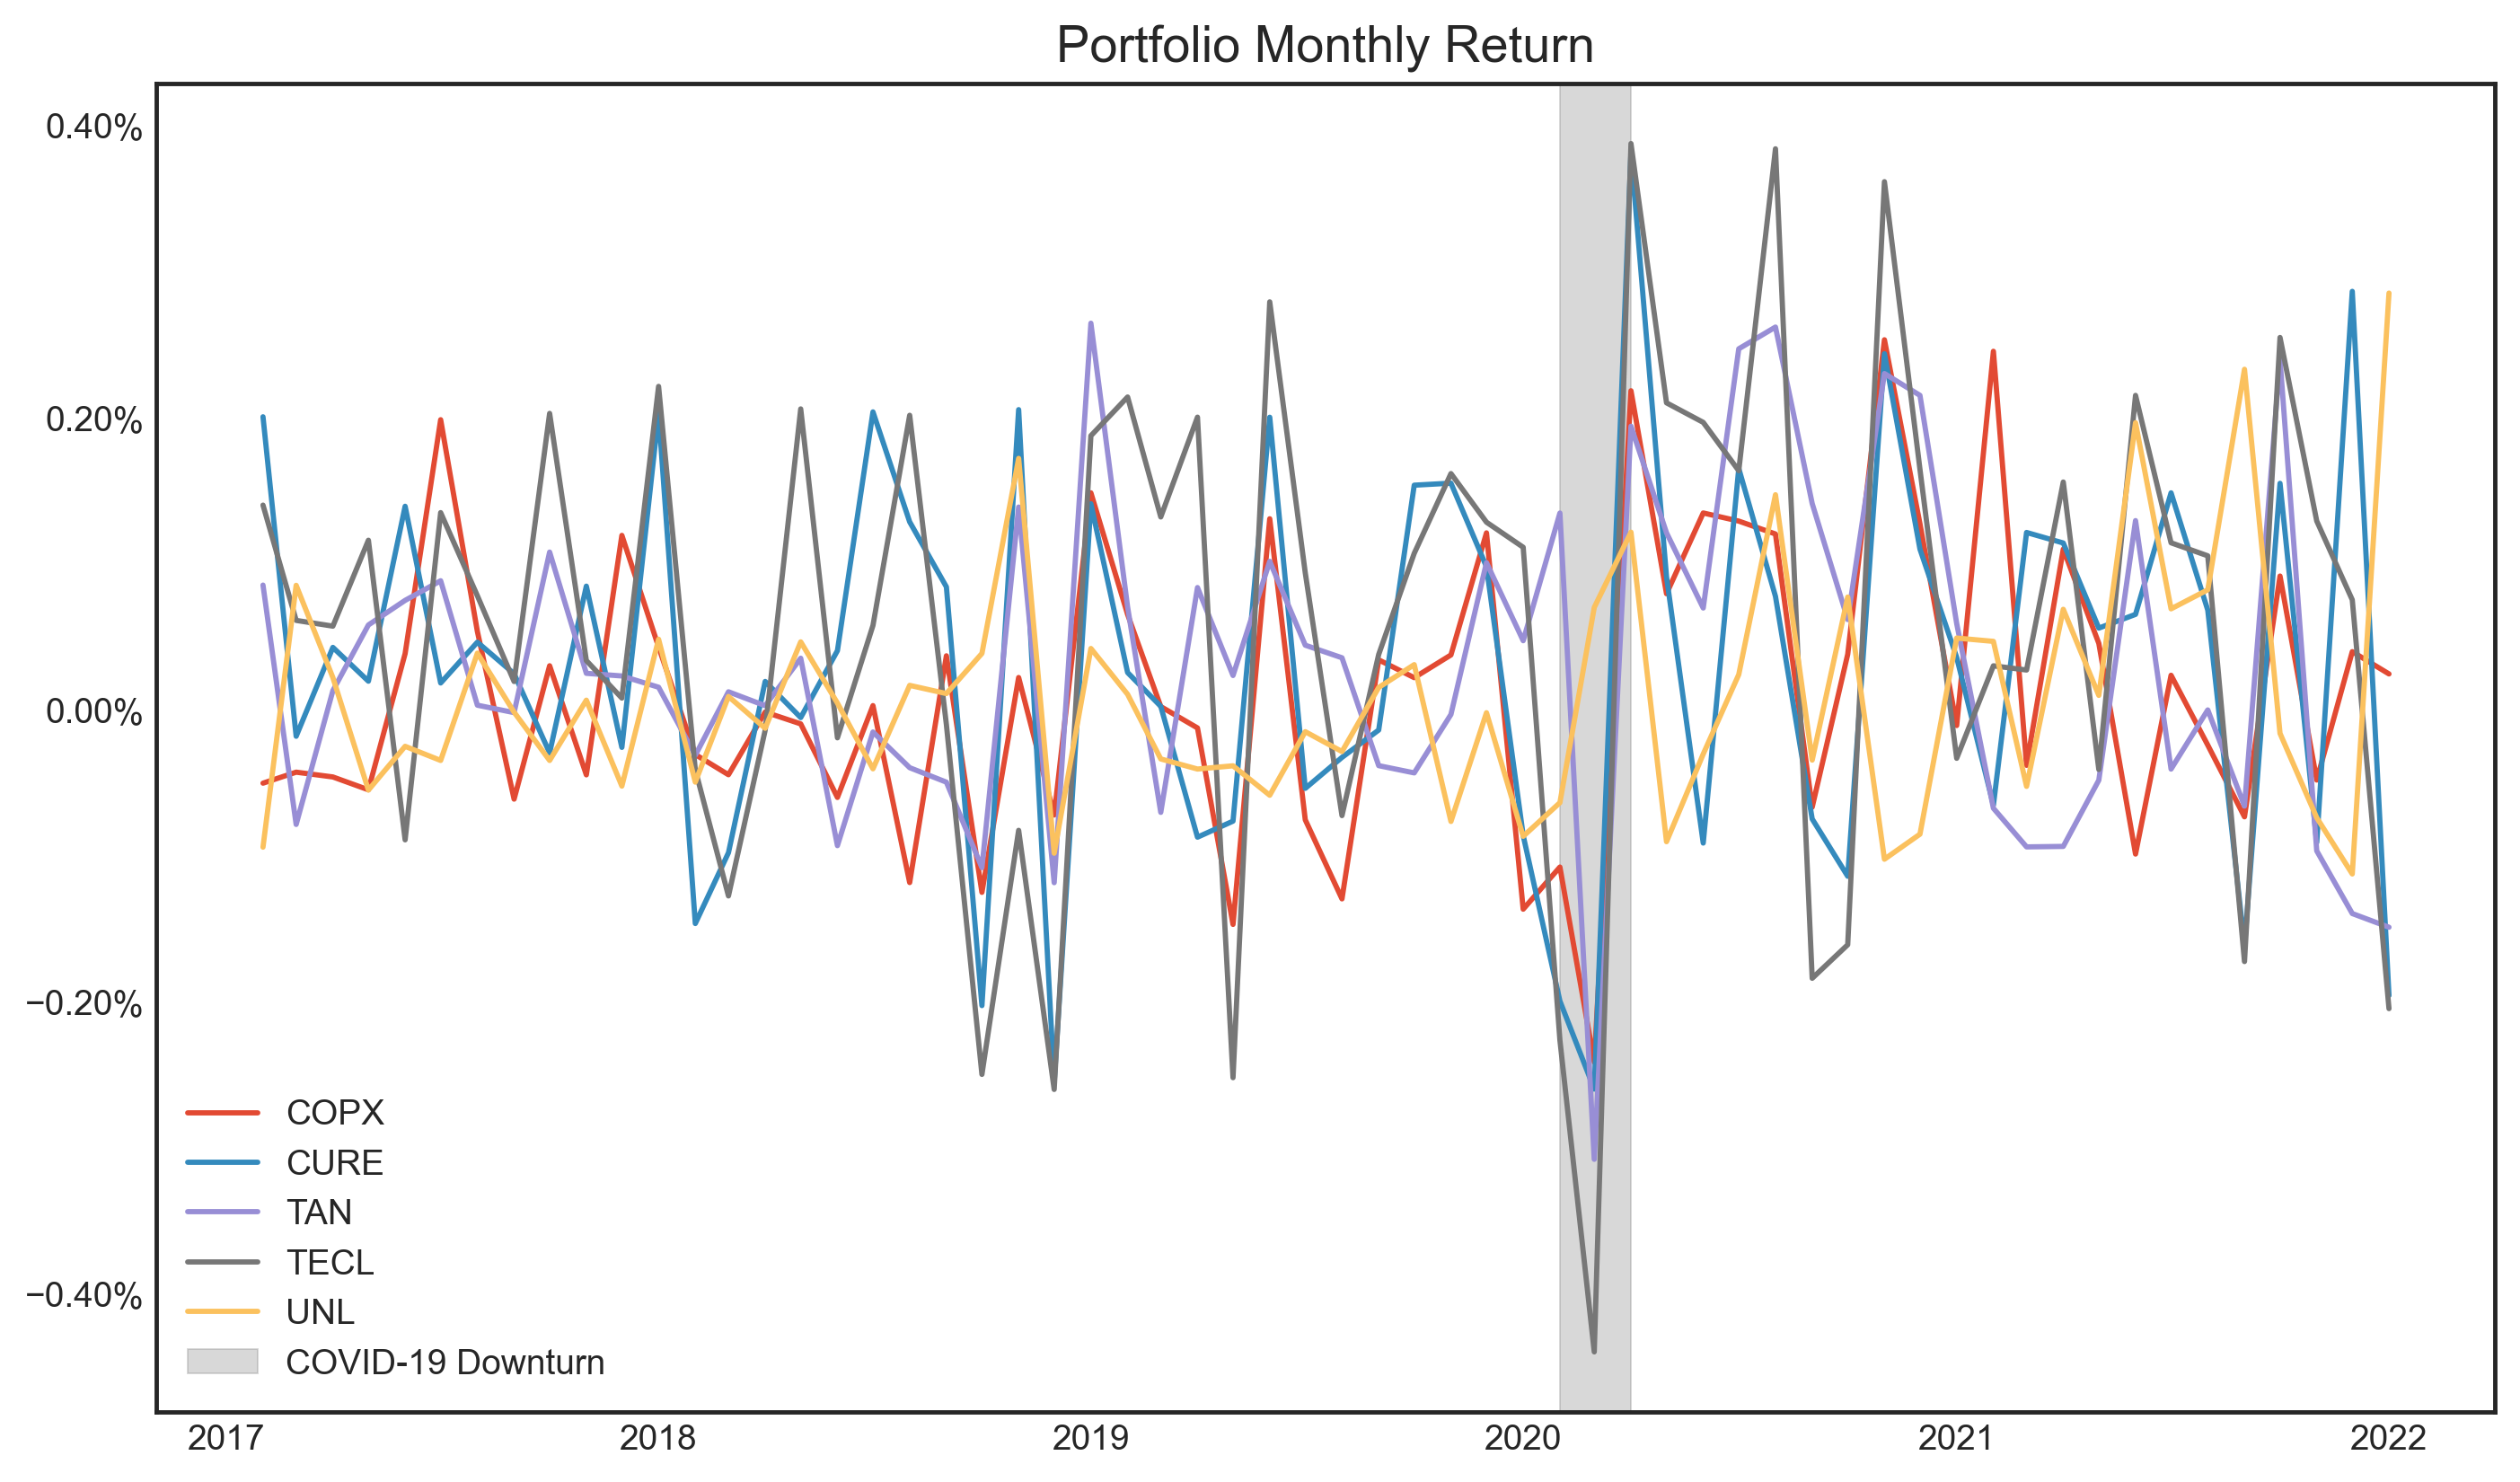

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(returns, label=returns.columns)
ax.axvspan(
    date2num(datetime(2020, 2, 1)),
    date2num(datetime(2020, 4, 1)),
    label="COVID-19 Downturn",
    color="grey",
    alpha=0.3,
)
ax.legend(loc=3)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Portfolio Monthly Return")
plt.show()

In [16]:
returns_m, returns_n = returns.shape

 #### Table 1: Summary Statistics

In [17]:
table_1 = pd.DataFrame(
    {
        "Arithmetic Mean": returns.mean(),
        "Geometric Mean": (gmean(returns + 1) - 1),
        "Standard Deviation": returns.std(
            ddof=0
        ),  # degrees of freedom=0 for population stats
        "Current Value: $10k": npf.fv(
            rate=(gmean(returns + 1) - 1),
            pmt=0,
            nper=returns_m,
            pv=[-10000] * returns_n,
        ),
    }
)
table_1.style.format(proper_format)

 #### Annualized Returns

 And if we decided to look at the annualized returns:

 $$
 APY = (1+r_{\text{month}})^{12} - 1 \\
 \sigma_{\text{yearly}} = \sigma_{\text{month}} \times \sqrt{12}
 $$

In [18]:
annualized = table_1.copy()
annualized[["Arithmetic Mean", "Geometric Mean"]] = (
    annualized[["Arithmetic Mean", "Geometric Mean"]] + 1
) ** (12) - 1
annualized["Standard Deviation"] = annualized["Standard Deviation"] * (12 ** 0.5)

In [19]:
annualized.style.format(proper_format)

 ### B. Table 2: Covariance Matrix

In [20]:
returns.cov(ddof=0)

COPX      CURE       TAN      TECL       UNL
COPX  0.009949  0.006880  0.005414  0.010072 -0.000122
CURE  0.006880  0.017991  0.006243  0.015203 -0.000896
TAN   0.005414  0.006243  0.012513  0.010426 -0.000801
TECL  0.010072  0.015203  0.010426  0.028222 -0.001636
UNL  -0.000122 -0.000896 -0.000801 -0.001636  0.006562

 ### C. Table 3: Correlation Matrix

In [21]:
returns.corr()

COPX      CURE       TAN      TECL       UNL
COPX  1.000000  0.514265  0.485192  0.601041 -0.015084
CURE  0.514265  1.000000  0.416102  0.674708 -0.082427
TAN   0.485192  0.416102  1.000000  0.554818 -0.088396
TECL  0.601041  0.674708  0.554818  1.000000 -0.120231
UNL  -0.015084 -0.082427 -0.088396 -0.120231  1.000000

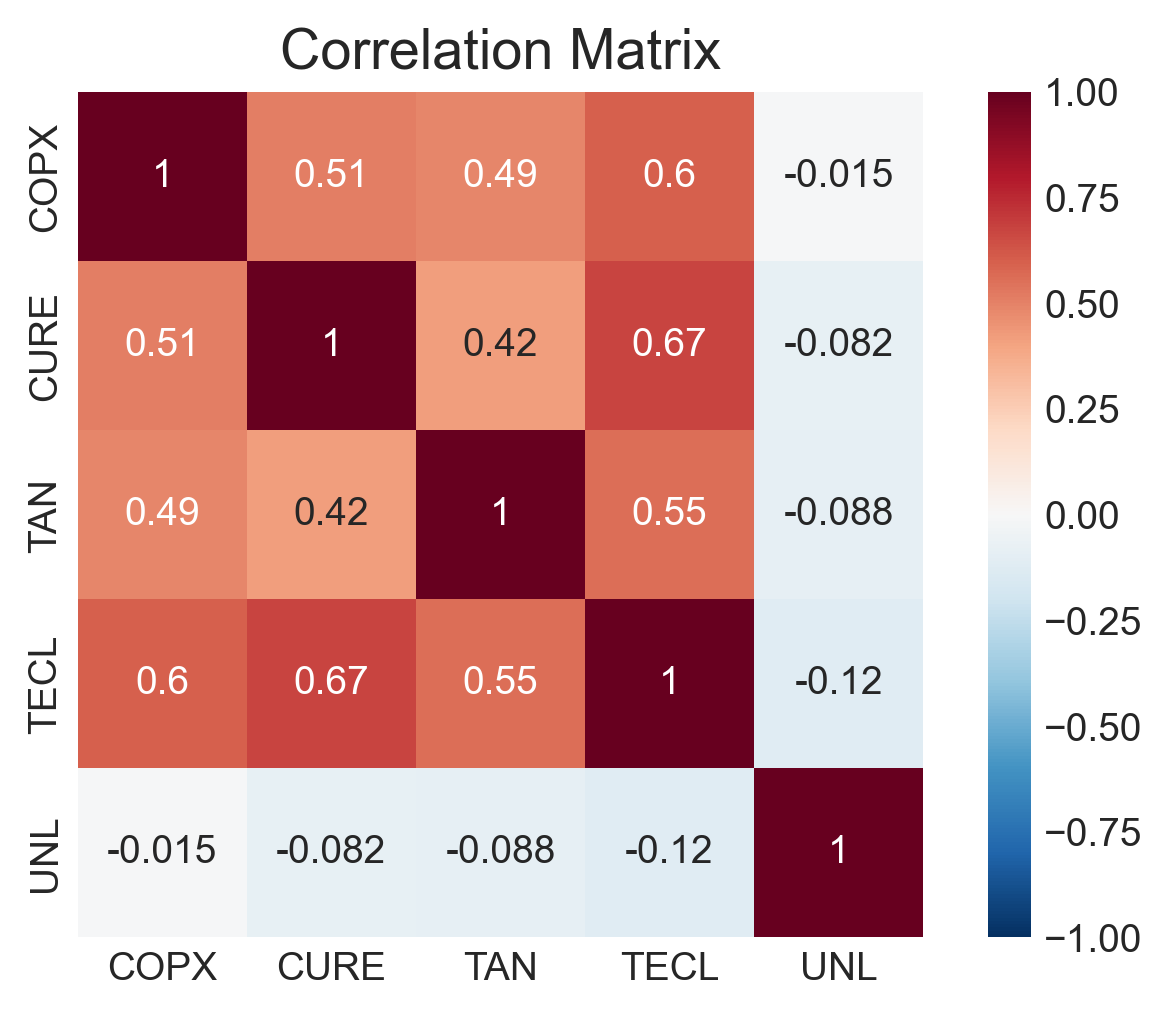

In [22]:
# sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(
    returns.corr(),
    annot=True,
    cmap="RdBu_r",
    square=True,
    vmin=-1,
    vmax=1,
).set_title("Correlation Matrix")
plt.show()

 ### D. Prospectus Strategy

 Using each fund’s prospectus or information you find on the web, state in your
 own words the strategy and philosophy of each fund.

 ## Part Two

 ### A. CAPM

 Using Treasury bill rates and the S&P 500 index, run a “CAPM” regression to
 estimate the beta of each fund. Constant maturity 3-month T-bill rates can be
 obtained on the web site of The Federal Reserve Bank of Saint Louis, Missouri
 (“FRED”). These rates are quoted in an annualized format, so adjust them
 according to your needs.

 Beta is defined as:

 $$
 \beta_i = \frac{\sigma_{iM}}{\sigma^{2}_{M}}
 $$

In [23]:
# Note that Python uses zero-indices
t13 = pdr.DataReader("GS3M", "fred", "02/2017", end)
rm = yf.download(["^GSPC", "^DJI"], start=start, end=end, interval="1mo")["Adj Close"]
rm = rm.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


 Since Treasury Bill Rates are quoted annually and already in percentage form,
 we will convert this to decimal and monthly return.


 According to the [U.S. Treasury](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics/interest-rates-frequently-asked-questions),
 the Constant Maturity Rates are _expressed on a simple annualized basis_,
 therefore to convert them to a monthly basis, we will multiply by `12`.

In [24]:
t13 = t13.div(100).div(12)

 The traditional equation for the Capital Asset Pricing Model
 (CAPM) is as follows:

 $$ R_i = R_f + \beta(R_m -  R_f) $$

 yet we are looking to find the our beta coefficient, which we can find by
 re-arranging the equation into:

 $$ R_i - R_f = \beta(R_m - R_f) $$

 which translates into:

 $$ R_\text{Fund} - R_{\text{TBill 13W}} =  \beta(R_{\text{S&P500}} -
 R_{\text{TBill 13W}}) \\
 $$

 ### B. β

 Repeat part A using this time the Dow Jones Industrial Average instead of the
 S&P 500 index.

In [25]:
sp500_ols = [sm.OLS(endog=returns[fund], exog=rm["^GSPC"]).fit() for fund in funds]

In [26]:
djia_ols = [sm.OLS(endog=returns[fund], exog=rm["^DJI"]).fit() for fund in funds]

In [27]:
sp500_beta = [sp500_ols[fund].params[0] for fund in range(5)]

In [28]:
djia_beta = [djia_ols[fund].params[0] for fund in range(5)]

In [29]:
betas = pd.DataFrame([sp500_beta, djia_beta], columns=funds, index=["^GSPC", "^DJI"])
display(Markdown("$\\beta$ per Fund and Market"), betas)

$\beta$ per Fund and Market

COPX      CURE       TAN      TECL       UNL
^GSPC  1.518900  2.544627  1.462964  3.495391 -0.081928
^DJI   1.513248  2.466365  1.335875  3.213447 -0.143975

In [30]:
riskFree = t13.mean()[0]
returnSP = rm["^GSPC"].mean()
returnDJIA = rm["^DJI"].mean()

 $$E(R_i) = R_f + \beta(R_m -  R_f)$$

In [31]:
E_R = pd.DataFrame()
E_R["^GSPC"] = riskFree + betas.T["^GSPC"] * (returnDJIA - riskFree)
E_R["^DJI"] = riskFree + betas.T["^DJI"] * (returnDJIA - riskFree)

In [32]:
display(Markdown("$E(R)$ Expected Return explained by $R_m$"))
display(
    E_R.sort_index().T.style.format(PERCENT),
    table_1["Arithmetic Mean"].sort_index().to_frame().T.style.format(PERCENT),
)

$E(R)$ Expected Return explained by $R_m$

In [33]:
buy_suggestion = pd.DataFrame()
buy_suggestion["^GSPC"] = (
    E_R["^GSPC"].sort_index() < table_1["Arithmetic Mean"].sort_index()
)
buy_suggestion["^DJI"] = (
    E_R["^DJI"].sort_index() < table_1["Arithmetic Mean"].sort_index()
)
display(
    Markdown(
        "Buy Suggestion: if actual return is larger than expected return $R_i > E(R)$"
    )
)
buy_suggestion.sort_index()

Buy Suggestion: if actual return is larger than expected return $R_i > E(R)$

^GSPC   ^DJI
COPX  False  False
CURE   True   True
TAN    True   True
TECL   True   True
UNL    True   True

 ### C. Table 4

 Show the T-bill rates and the two index levels in tabular form.

In [34]:
table_4 = pd.concat([rm, t13], axis=1)
table_4

^DJI     ^GSPC      GS3M
2017-02-01  0.047732  0.037198  0.000442
2017-03-01 -0.007160 -0.000389  0.000625
2017-04-01  0.013419  0.009091  0.000675
2017-05-01  0.003254  0.011576  0.000750
2017-06-01  0.016230  0.004814  0.000833
2017-07-01  0.025363  0.019349  0.000908
2017-08-01  0.002603  0.000546  0.000858
2017-09-01  0.020821  0.019303  0.000875
2017-10-01  0.043390  0.022188  0.000908
2017-11-01  0.038290  0.028083  0.001042
2017-12-01  0.018411  0.009832  0.001117
2018-01-01  0.057857  0.056179  0.001192
2018-02-01 -0.042838 -0.038947  0.001325
2018-03-01 -0.037000 -0.026884  0.001442
2018-04-01  0.002491  0.002719  0.001492
2018-05-01  0.010458  0.021608  0.001583
2018-06-01 -0.005915  0.004842  0.001617
2018-07-01  0.047125  0.036022  0.001658
2018-08-01  0.021626  0.030263  0.001725
2018-09-01  0.019006  0.004294  0.001808
2018-10-01 -0.050742 -0.069403  0.001908
2018-11-01  0.016830  0.017859  0.001975
2018-12-01 -0.086575 -0.091777  0.002008
2019-01-01  0.071684  0.078684  0.002017
2019-02-01  0.036654  0.029729  0.002033
2019-03-01  0.000489  0.017924  0.002042
2019-04-01  0.025618  0.039313  0.002025
2019-05-01 -0.066855 -0.065778  0.002000
2019-06-01  0.071929  0.068930  0.001850
2019-07-01  0.009936  0.013128  0.001792
2019-08-01 -0.017160 -0.018092  0.001658
2019-09-01  0.019450  0.017181  0.001608
2019-10-01  0.004807  0.020432  0.001400
2019-11-01  0.037165  0.034047  0.001308
2019-12-01  0.017362  0.028590  0.001308
2020-01-01 -0.009896 -0.001628  0.001292
2020-02-01 -0.100746 -0.084110  0.001283
2020-03-01 -0.137438 -0.125119  0.000250
2020-04-01  0.110806  0.126844  0.000117
2020-05-01  0.042611  0.045282  0.000108
2020-06-01  0.016931  0.018388  0.000133
2020-07-01  0.023842  0.055101  0.000108
2020-08-01  0.075742  0.070065  0.000083
2020-09-01 -0.022805 -0.039228  0.000092
2020-10-01 -0.046077 -0.027666  0.000083
2020-11-01  0.118372  0.107546  0.000075
2020-12-01  0.032655  0.037121  0.000075
2021-01-01 -0.020383 -0.011137  0.000067
2021-02-01  0.031677  0.026091  0.000033
2021-03-01  0.066247  0.042439  0.000025
2021-04-01  0.027085  0.052425  0.000017
2021-05-01  0.019324  0.005486  0.000017
2021-06-01 -0.000780  0.022214  0.000033
2021-07-01  0.012549  0.022748  0.000042
2021-08-01  0.012173  0.028990  0.000042
2021-09-01 -0.042895 -0.047569  0.000033
2021-10-01  0.058375  0.069144  0.000042
2021-11-01 -0.037294 -0.008334  0.000042
2021-12-01  0.053781  0.043613  0.000050
2022-01-01 -0.033200 -0.052585  0.000125

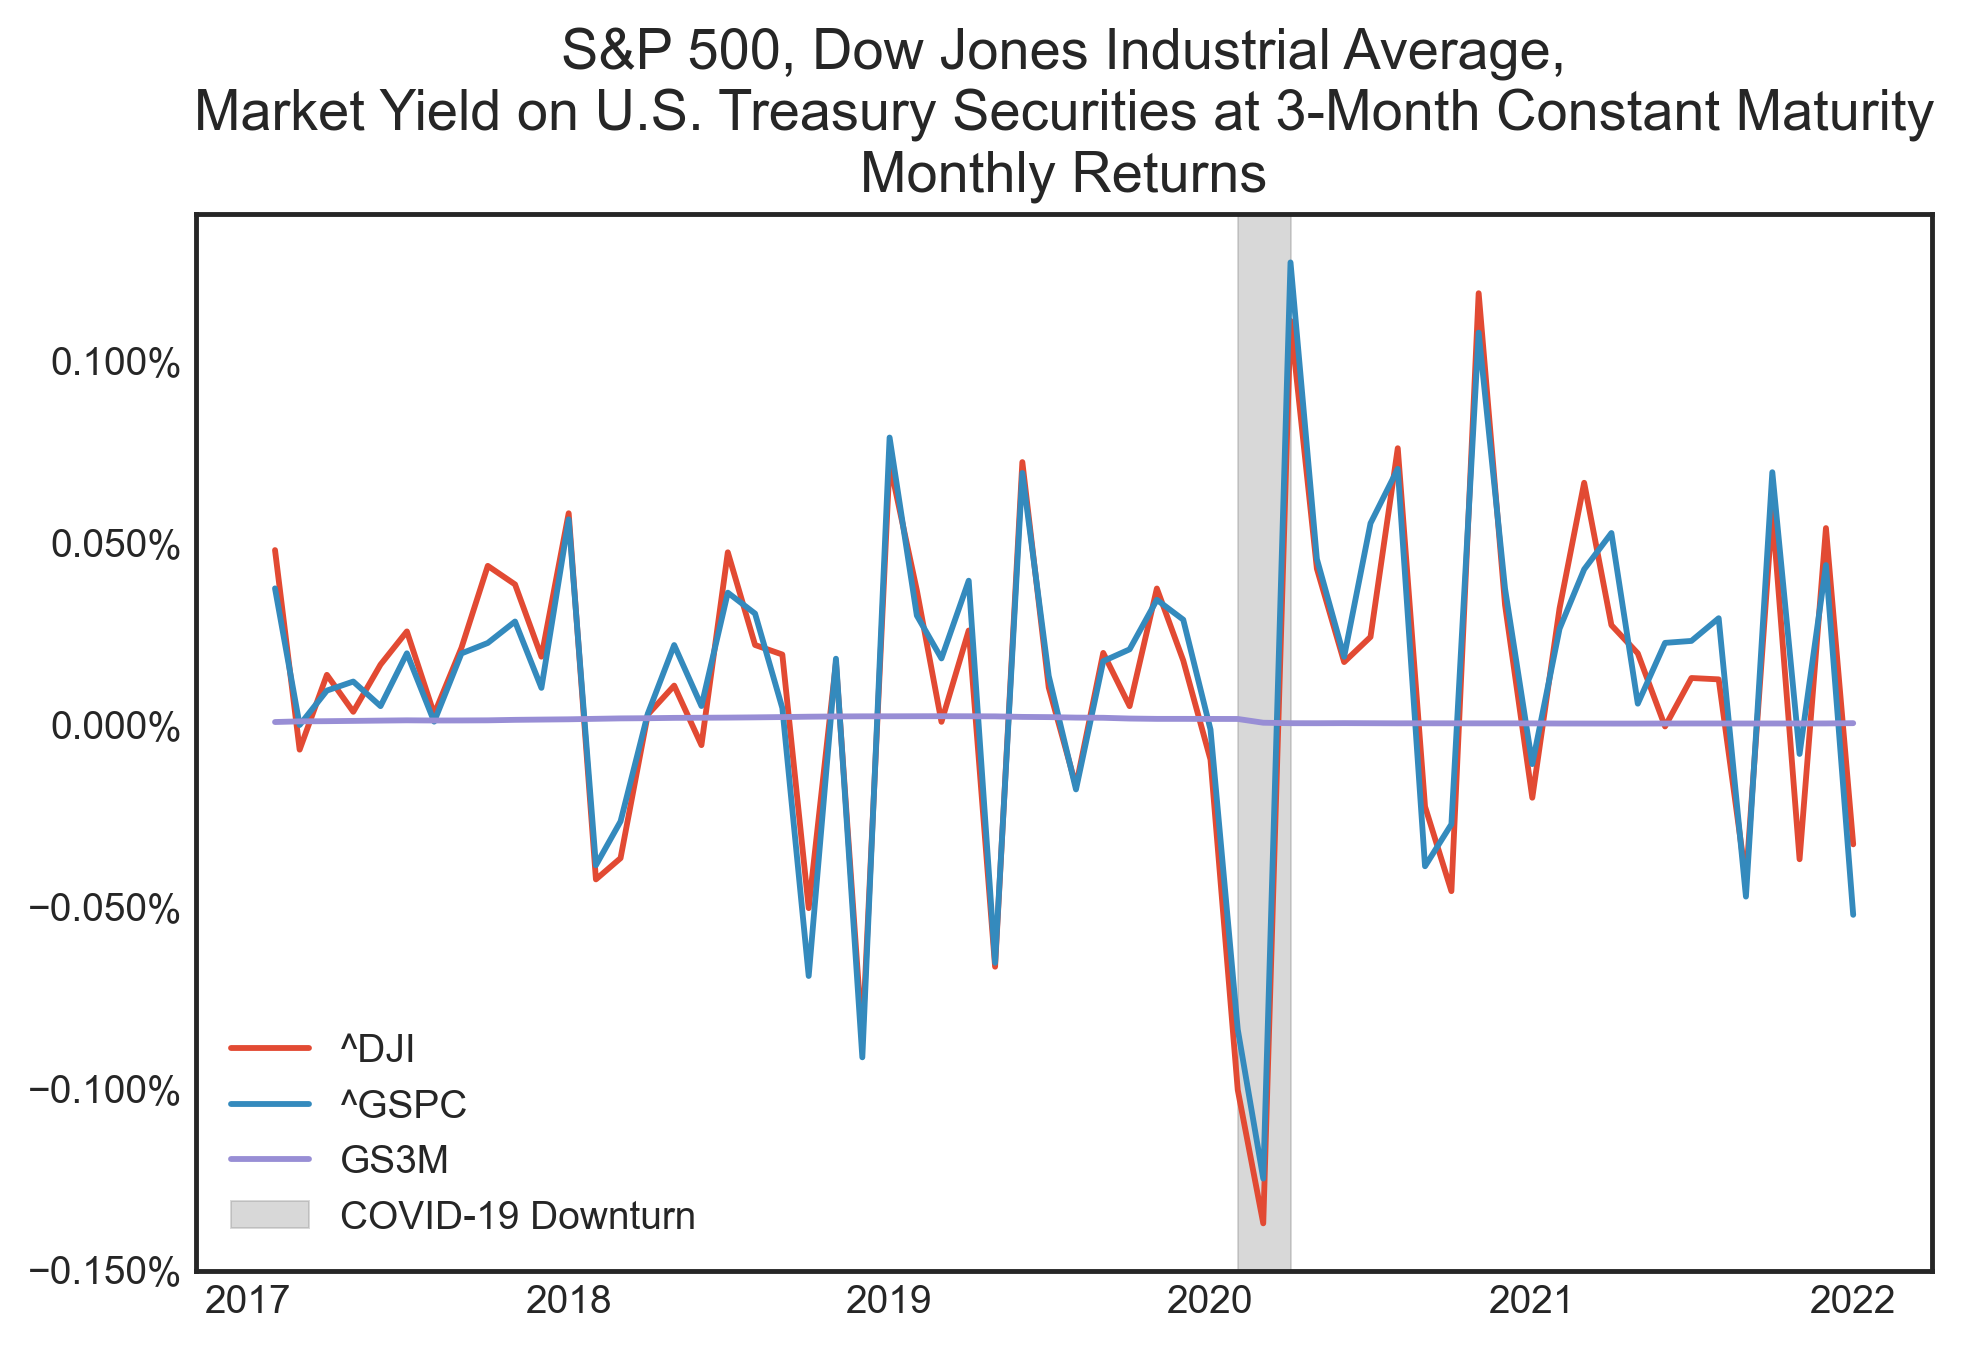

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(table_4, label=table_4.columns)
ax.axvspan(
    date2num(datetime(2020, 2, 1)),
    date2num(datetime(2020, 4, 1)),
    label="COVID-19 Downturn",
    color="grey",
    alpha=0.3,
)
ax.legend(loc=3)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title(
    "S&P 500, Dow Jones Industrial Average,"
    "\n"
    "Market Yield on U.S. Treasury Securities at 3-Month Constant Maturity"
    "\n"
    "Monthly Returns"
)
plt.show()

 ### D. Essay: Differences between Dow Jones and S&P 500

In [36]:
returns_tidy = pd.melt(returns.reset_index(), id_vars="Date").set_index("Date")
returns_tidy = returns_tidy.rename(columns={"variable": "Fund", "value": "Return"})

In [37]:
try:
    tidy_data = pd.concat([pd.concat([table_4] * 5), returns_tidy], axis=1)
    tidy_data.to_pickle("data/tidy_huh.pkl")
except:
    get_ipython().system(
        "wget https://raw.githubusercontent.com/danielcs88/project_fin6525/main/data/tidy_huh.pkl"
    )
    with open("tidy_huh.pkl", "rb") as fh:
        tidy_data = pickle.load(fh)

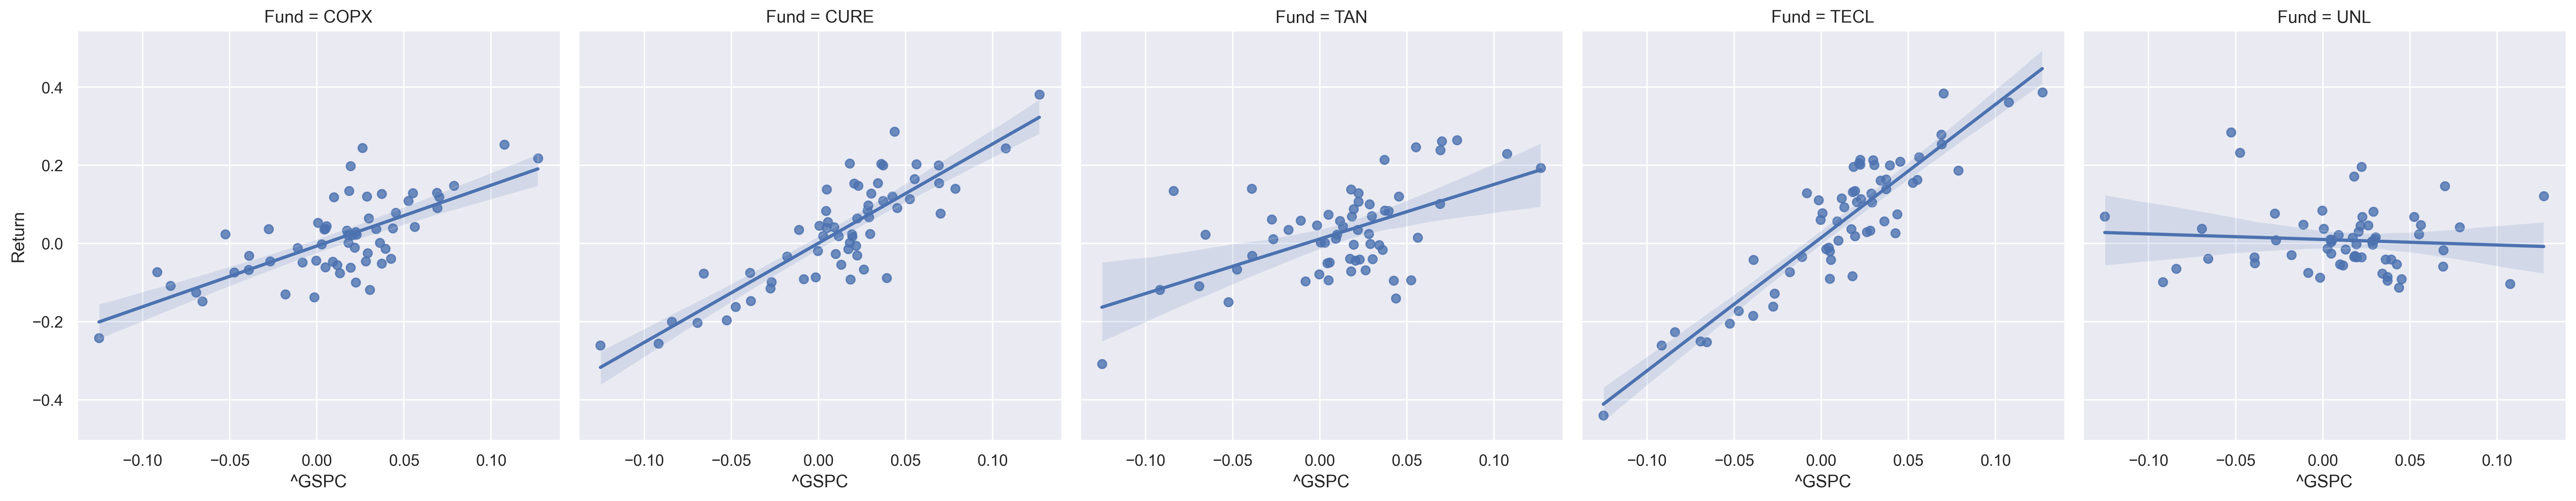

In [38]:
sns.set(rc={"figure.figsize": (6, 30)})
sns.lmplot(x="^GSPC", y="Return", col="Fund", data=tidy_data)
plt.show()

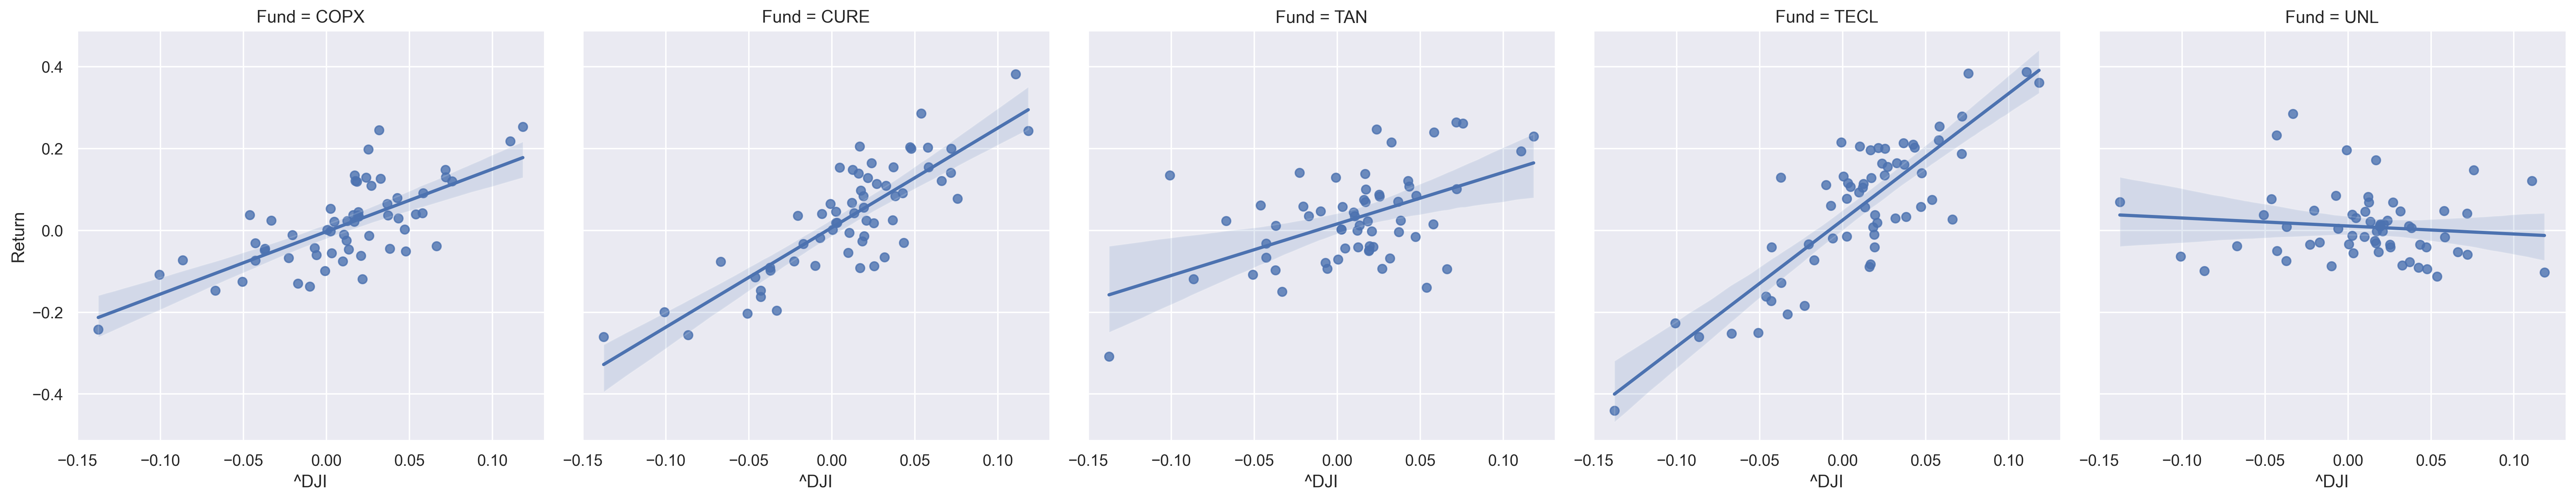

In [39]:
sns.set(rc={"figure.figsize": (6, 30)})
sns.lmplot(x="^DJI", y="Return", col="Fund", data=tidy_data)
plt.show()

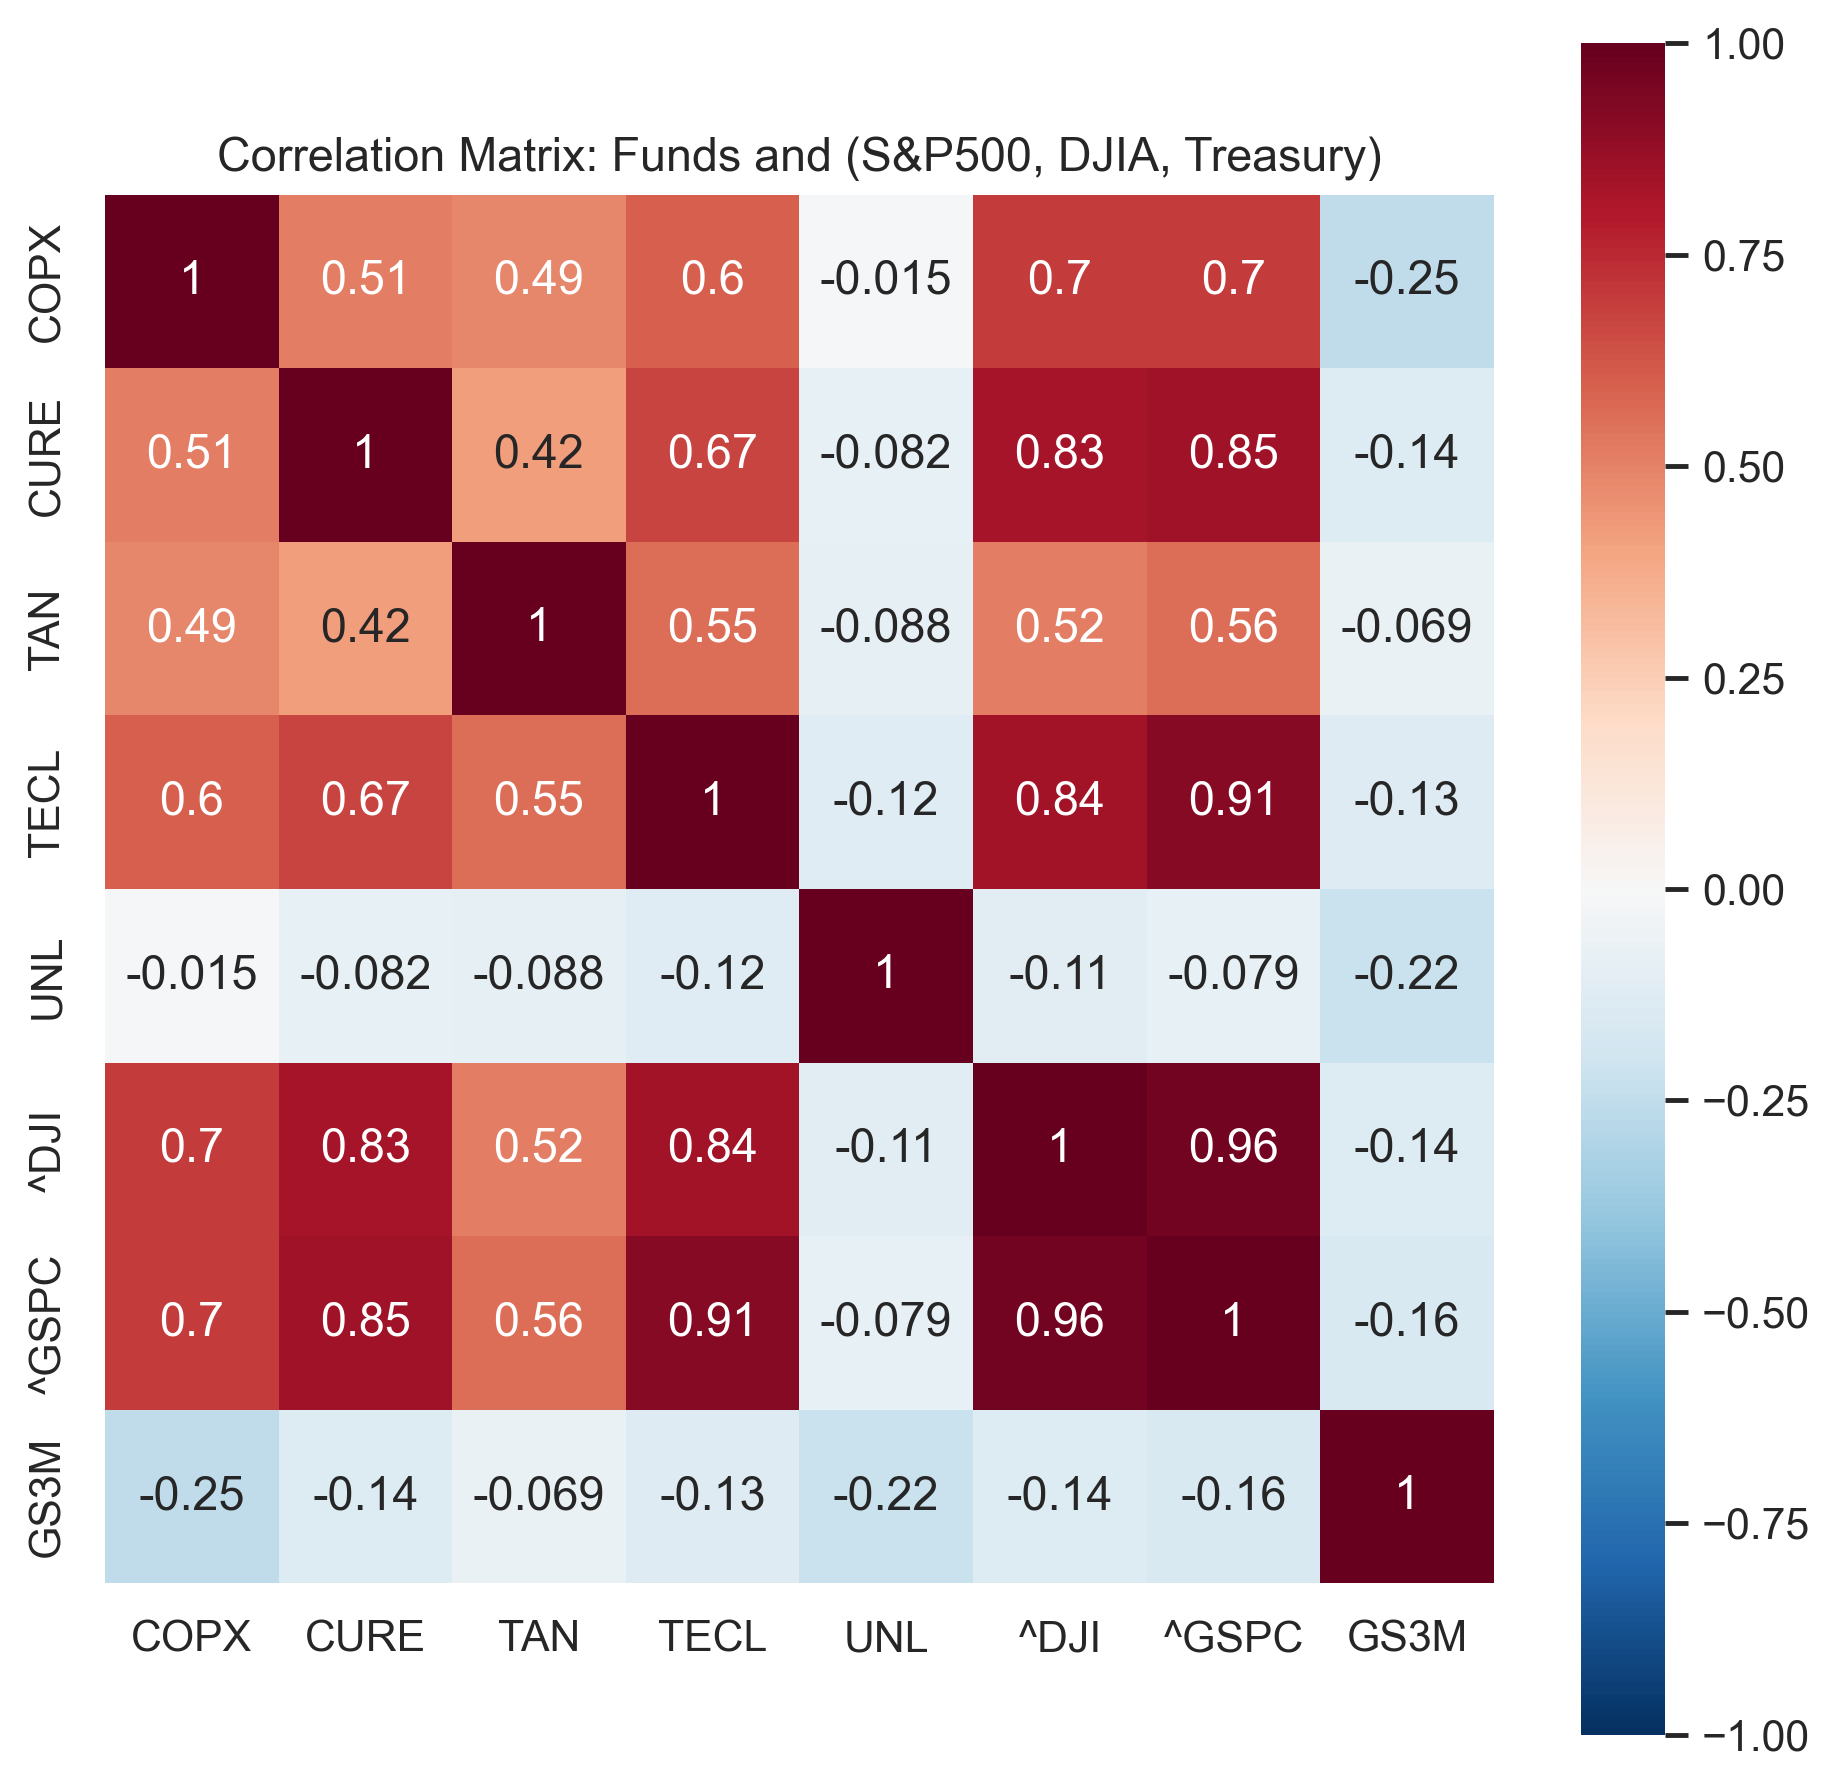

In [40]:
sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(
    pd.concat([returns, table_4], axis=1).corr(),
    annot=True,
    cmap="RdBu_r",
    square=True,
    vmin=-1,
    vmax=1,
).set_title("Correlation Matrix: Funds and (S&P500, DJIA, Treasury)")
plt.show()

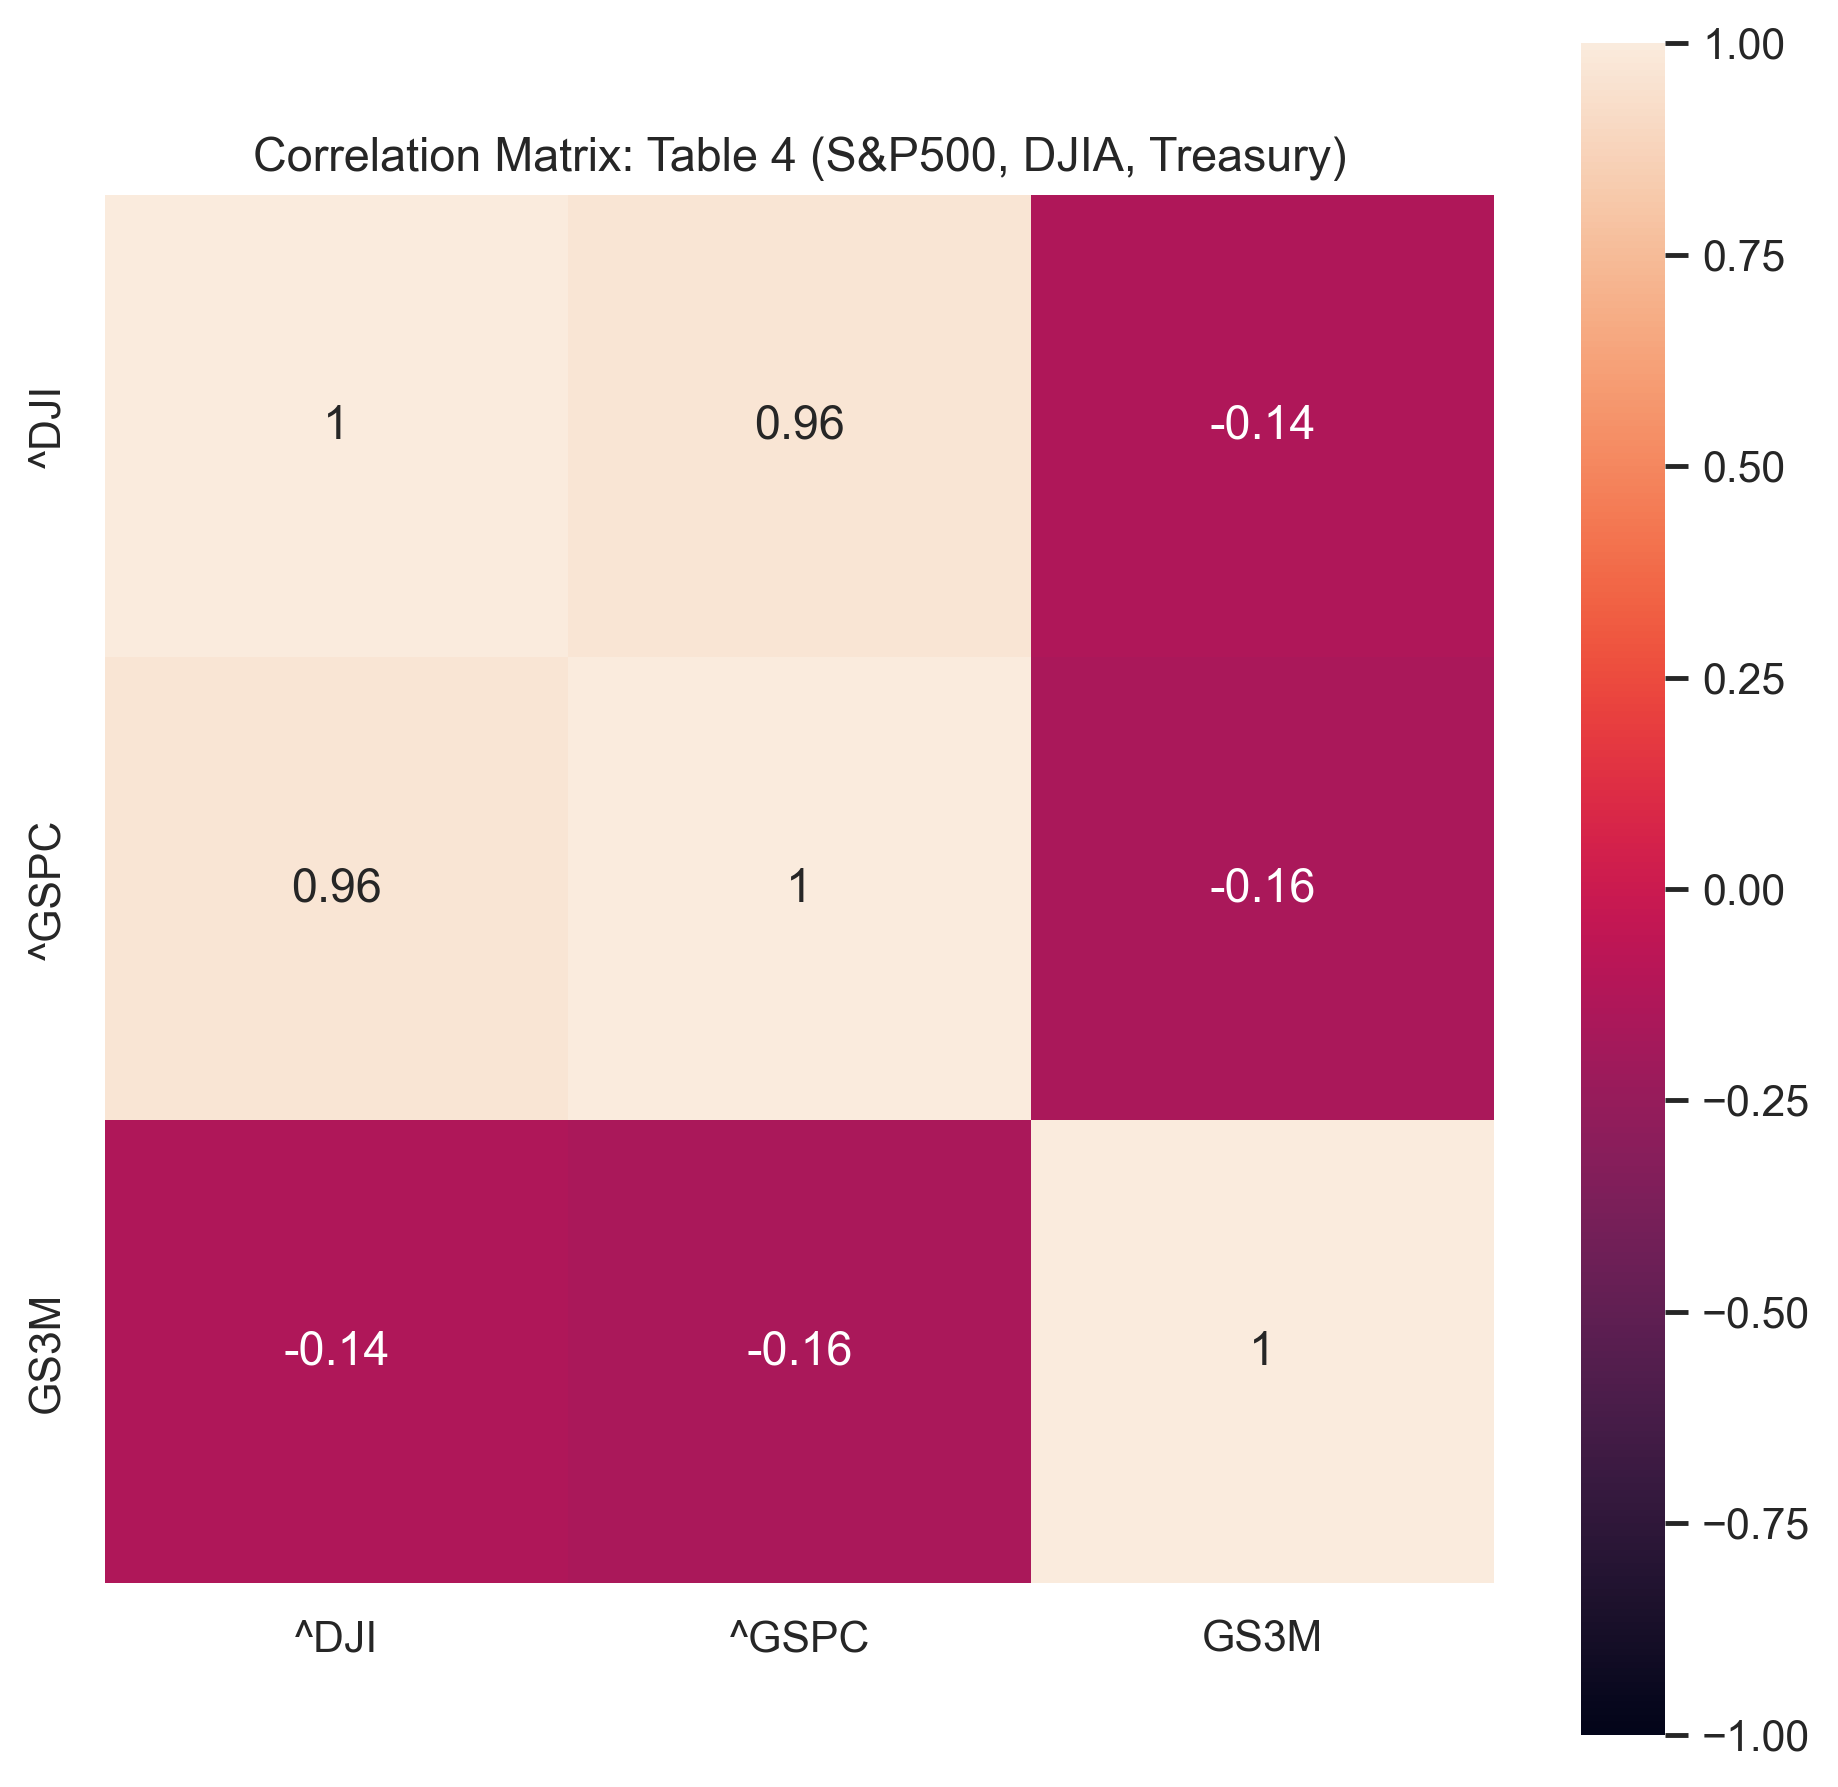

In [41]:
# sns.set(rc={"figure.figsize": (8, 8)})
sns.heatmap(
    table_4.corr(),
    annot=True,
    # cmap="RdBu_r",
    square=True,
    vmin=-1,
    vmax=1,
).set_title("Correlation Matrix: Table 4 (S&P500, DJIA, Treasury)")
plt.show()

 ### E. Runs Test: S&P 500

 $$
 \begin{align}
 Z &= \frac{R-\bar{x}}{\sigma} \\
 \text{where } R &= \text{number of runs;} \\
 \bar{x} &= \frac{2n_1 n_2}{n_1+ n_2} + 1 \\
 \sigma^2 &= \frac{2n_1 n_2 (2n_1 n_2 - n_1 - n_2)}{(n_1+n_2)^2 (n_1 + n_2 - 1)} \\
 n_1, n_2 &= \text{number of observations in each category} \\
 Z &= \text{standard normal variable}
 \end{align}
 $$

In [42]:
sp500 = rm["^GSPC"]

In [43]:
def num_runs(array) -> int:
    """
    Performs a Runs Test on an array of values, to calculate the number of runs
    and location (indices of runs)

    Parameters
    ----------
    array : np.ndarray
        [description]

    Returns
    -------
    int
        Number of runs in an array.
    """

    # Check where the indices change
    # array[:-1] = all elements except last
    # array[1:] =  all elments except first
    # np.sign will check sign of elements in array
    # - convert to 1 if positive
    # - convert to -1 if negative
    array = np.array(array)
    indices = np.where(np.sign(array[:-1]) != np.sign(array[1:]))[0] + 1
    # return len(indices), indices
    return len(indices)

In [44]:
Z = num_runs(sp500)

In [45]:
np.sign(sp500).value_counts()

 1.0    44
-1.0    16
Name: ^GSPC, dtype: int64

In [46]:
def runs_test(array) -> float:
    R = num_runs(array)
    n1, n2 = list(np.sign(array).value_counts().values)
    x_bar = (2 * n1 * n2) / (n1 + n2) + 1
    sigma_sq = (
        2 * n1 * n2 * (2 * n1 * n2 - n1 - n2) / (((n1 + n2) ** 2) * (n1 + n2 - 1))
    )
    Z = (R - x_bar) / np.sqrt(sigma_sq)
    return Z

In [47]:
Z = runs_test(sp500)
Z

-0.49063938179416305

In [48]:
display(
    Markdown(
        f"""Our Z statistic of **{Z:.3f}** is not close to the standard
normal distribution mean of 0.

We cannot be 95 percent certain that our observed stock prices
did not happen by chance unless we get a Z statistic whose absolute value is
1.96 or greater.

I did all the work above _show my work_, but thankfully Python does have a
faster method for this through `statsmodels`."""
    )
)

Our Z statistic of **-0.491** is not close to the standard
normal distribution mean of 0.

We cannot be 95 percent certain that our observed stock prices
did not happen by chance unless we get a Z statistic whose absolute value is
1.96 or greater.

I did all the work above _show my work_, but thankfully Python does have a
faster method for this through `statsmodels`.

In [49]:
Z, p = runs.runstest_1samp(rm["^GSPC"])
runs.runstest_1samp(rm["^GSPC"])

(0.49131080387234544, 0.6232066396680263)

In [50]:
display(
    Markdown(
        f"""The z-test statistic turns out to be **$Z={Z:.3f}$** and the
corresponding p-value is **$p={p:.3f}$**. Since this p-value is not less than
α = .05, we fail to reject the null hypothesis. We have sufficient evidence to
say that the data was produced in a random manner."""
    )
)

The z-test statistic turns out to be **$Z=0.491$** and the
corresponding p-value is **$p=0.623$**. Since this p-value is not less than
α = .05, we fail to reject the null hypothesis. We have sufficient evidence to
say that the data was produced in a random manner.

 #### Runs Test Interpretation

 ## Part Three

 #### A. Table 5

 A. Construct an equally-weighted portfolio of your five funds. Prepare a table
 showing the arithmetic mean return, geometric mean return, and standard
 deviation of return for the five-fund portfolio over the five years [TABLE 5].

 To calculate the standard deviation of the portfolio, we will use the formula
 of the variance of the portfolio and take its square root.

 $$
 \Large
 \begin{gather} \notag
 \begin{aligned}
 \sigma_p &= \sqrt{w' V w} \\
 &= \sqrt{\begin{bmatrix} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{bmatrix} \mathbf{V}
 \begin{bmatrix} 0.2 \\ 0.2 \\ 0.2 \\ 0.2 \\ 0.2 \end{bmatrix}}
 \end{aligned}
 \end{gather}
 $$

In [51]:
w = np.array([[0.2] * 5])

In [52]:
table_5 = pd.Series(
    {
        "Arithmetic Mean": returns.mean().dot(w.T).item(0),
        "Geometric Mean": (gmean(returns + 1) - 1).dot(w.T).item(0),
        "Standard Deviation": np.sqrt(w.dot(returns.cov(ddof=0)).dot(w.T).item(0)),
    }
).to_frame()
table_5 = table_5.T
table_5.index = ["Equally Weighted Portfolio"]
table_5.style.format(proper_format)

 ### B. Graph 1

 Using Excel, prepare a graph showing the five-year performance of each of your
 funds and the five-fund portfolio. This chart should show the dollar value of
 an initial \\$10,000 investment evolving month-by-month over the five-year
 period.

 #### Static Graph

In [53]:
portfolio_five = pd.DataFrame(
    {"Equally Weigthed Portfolio": 10000 * (1 + returns.mean(axis=1)).cumprod()}
)

In [54]:
sep_funds = (1 + returns).cumprod() * 10000

In [55]:
investments = pd.concat([portfolio_five, sep_funds], axis=1)

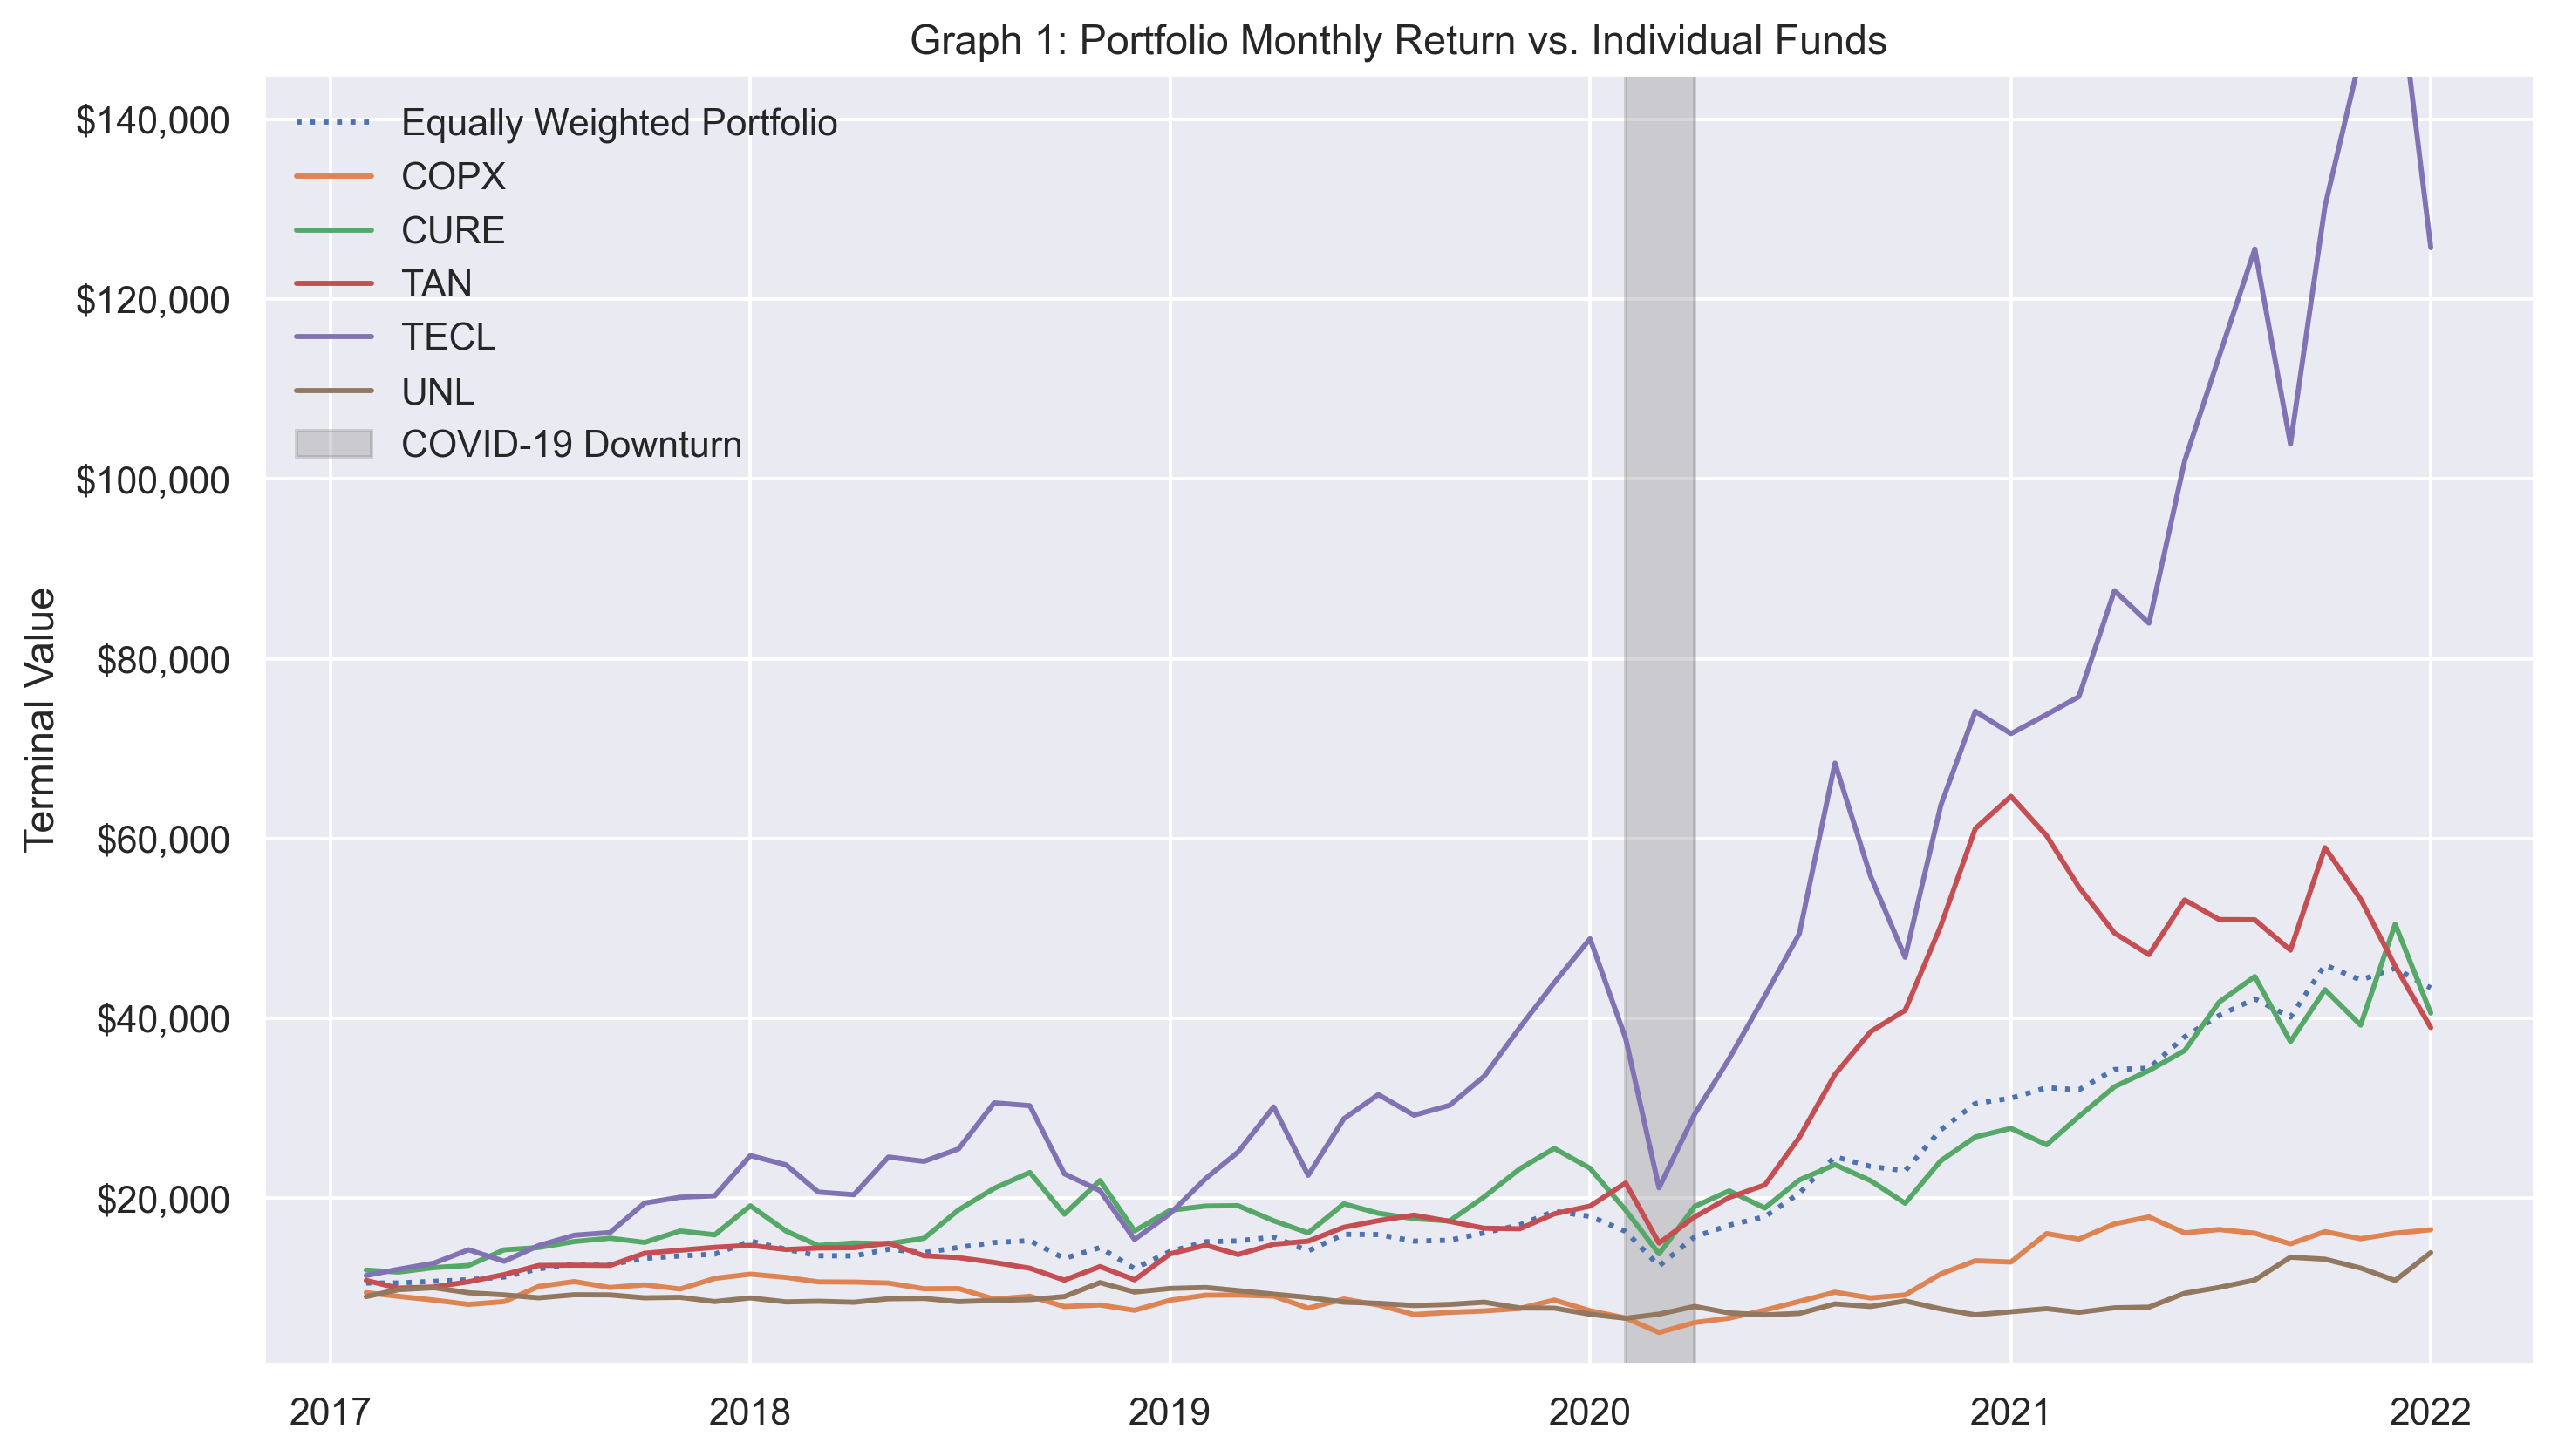

In [56]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(
    investments["Equally Weigthed Portfolio"],
    label="Equally Weighted Portfolio",
    linestyle=":",
)
ax.plot(investments[funds], label=funds)
ax.axvspan(
    date2num(datetime(2020, 2, 1)),
    date2num(datetime(2020, 4, 1)),
    label="COVID-19 Downturn",
    color="grey",
    alpha=0.3,
)
ax.legend()

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.0f}"))
ax.set_ylabel("Terminal Value")
ax.set_title("Graph 1: Portfolio Monthly Return vs. Individual Funds")
ax.set_ylim(1500, 145000)
plt.show()

In [57]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

 #### Dynamic Graph

 If I wanted a more interactive plot, I could use `pandas-bokeh`

In [58]:
investments.plot_bokeh.line(
    title="Graph 1: Individual Funds vs Portfolio",
    disable_scientific_axes="y",
    number_format="‘$0,0.0’",
    ylabel="Terminal Value [$]",
    legend="top_left",
    figsize=(1024, 600),
    panning=False,
    zooming=False,
)

Figure(id='1003', ...)

 ## Part 4

 Using the five-year performance statistics of your five funds and the
 five-fund portfolio, determine and show graphically the efficient set using
 the following:

 ### A. Graph 2: Mean Variance Plot

 This is merely a standard deviation / expected return plot showing six points,
 one for each fund and one for the five-fund portfolio. Identify the point that
 shows the best return per unit of risk.

In [59]:
mean_std = [table_1.columns[i] for i in [0, 2]]
mean_var = pd.concat([table_1[mean_std], table_5[mean_std]])
mean_var.style.format(proper_format)

In [60]:
mean_var = mean_var.reset_index()
mean_var.columns = ["Index", "Expected Return", "Standard Deviation"]

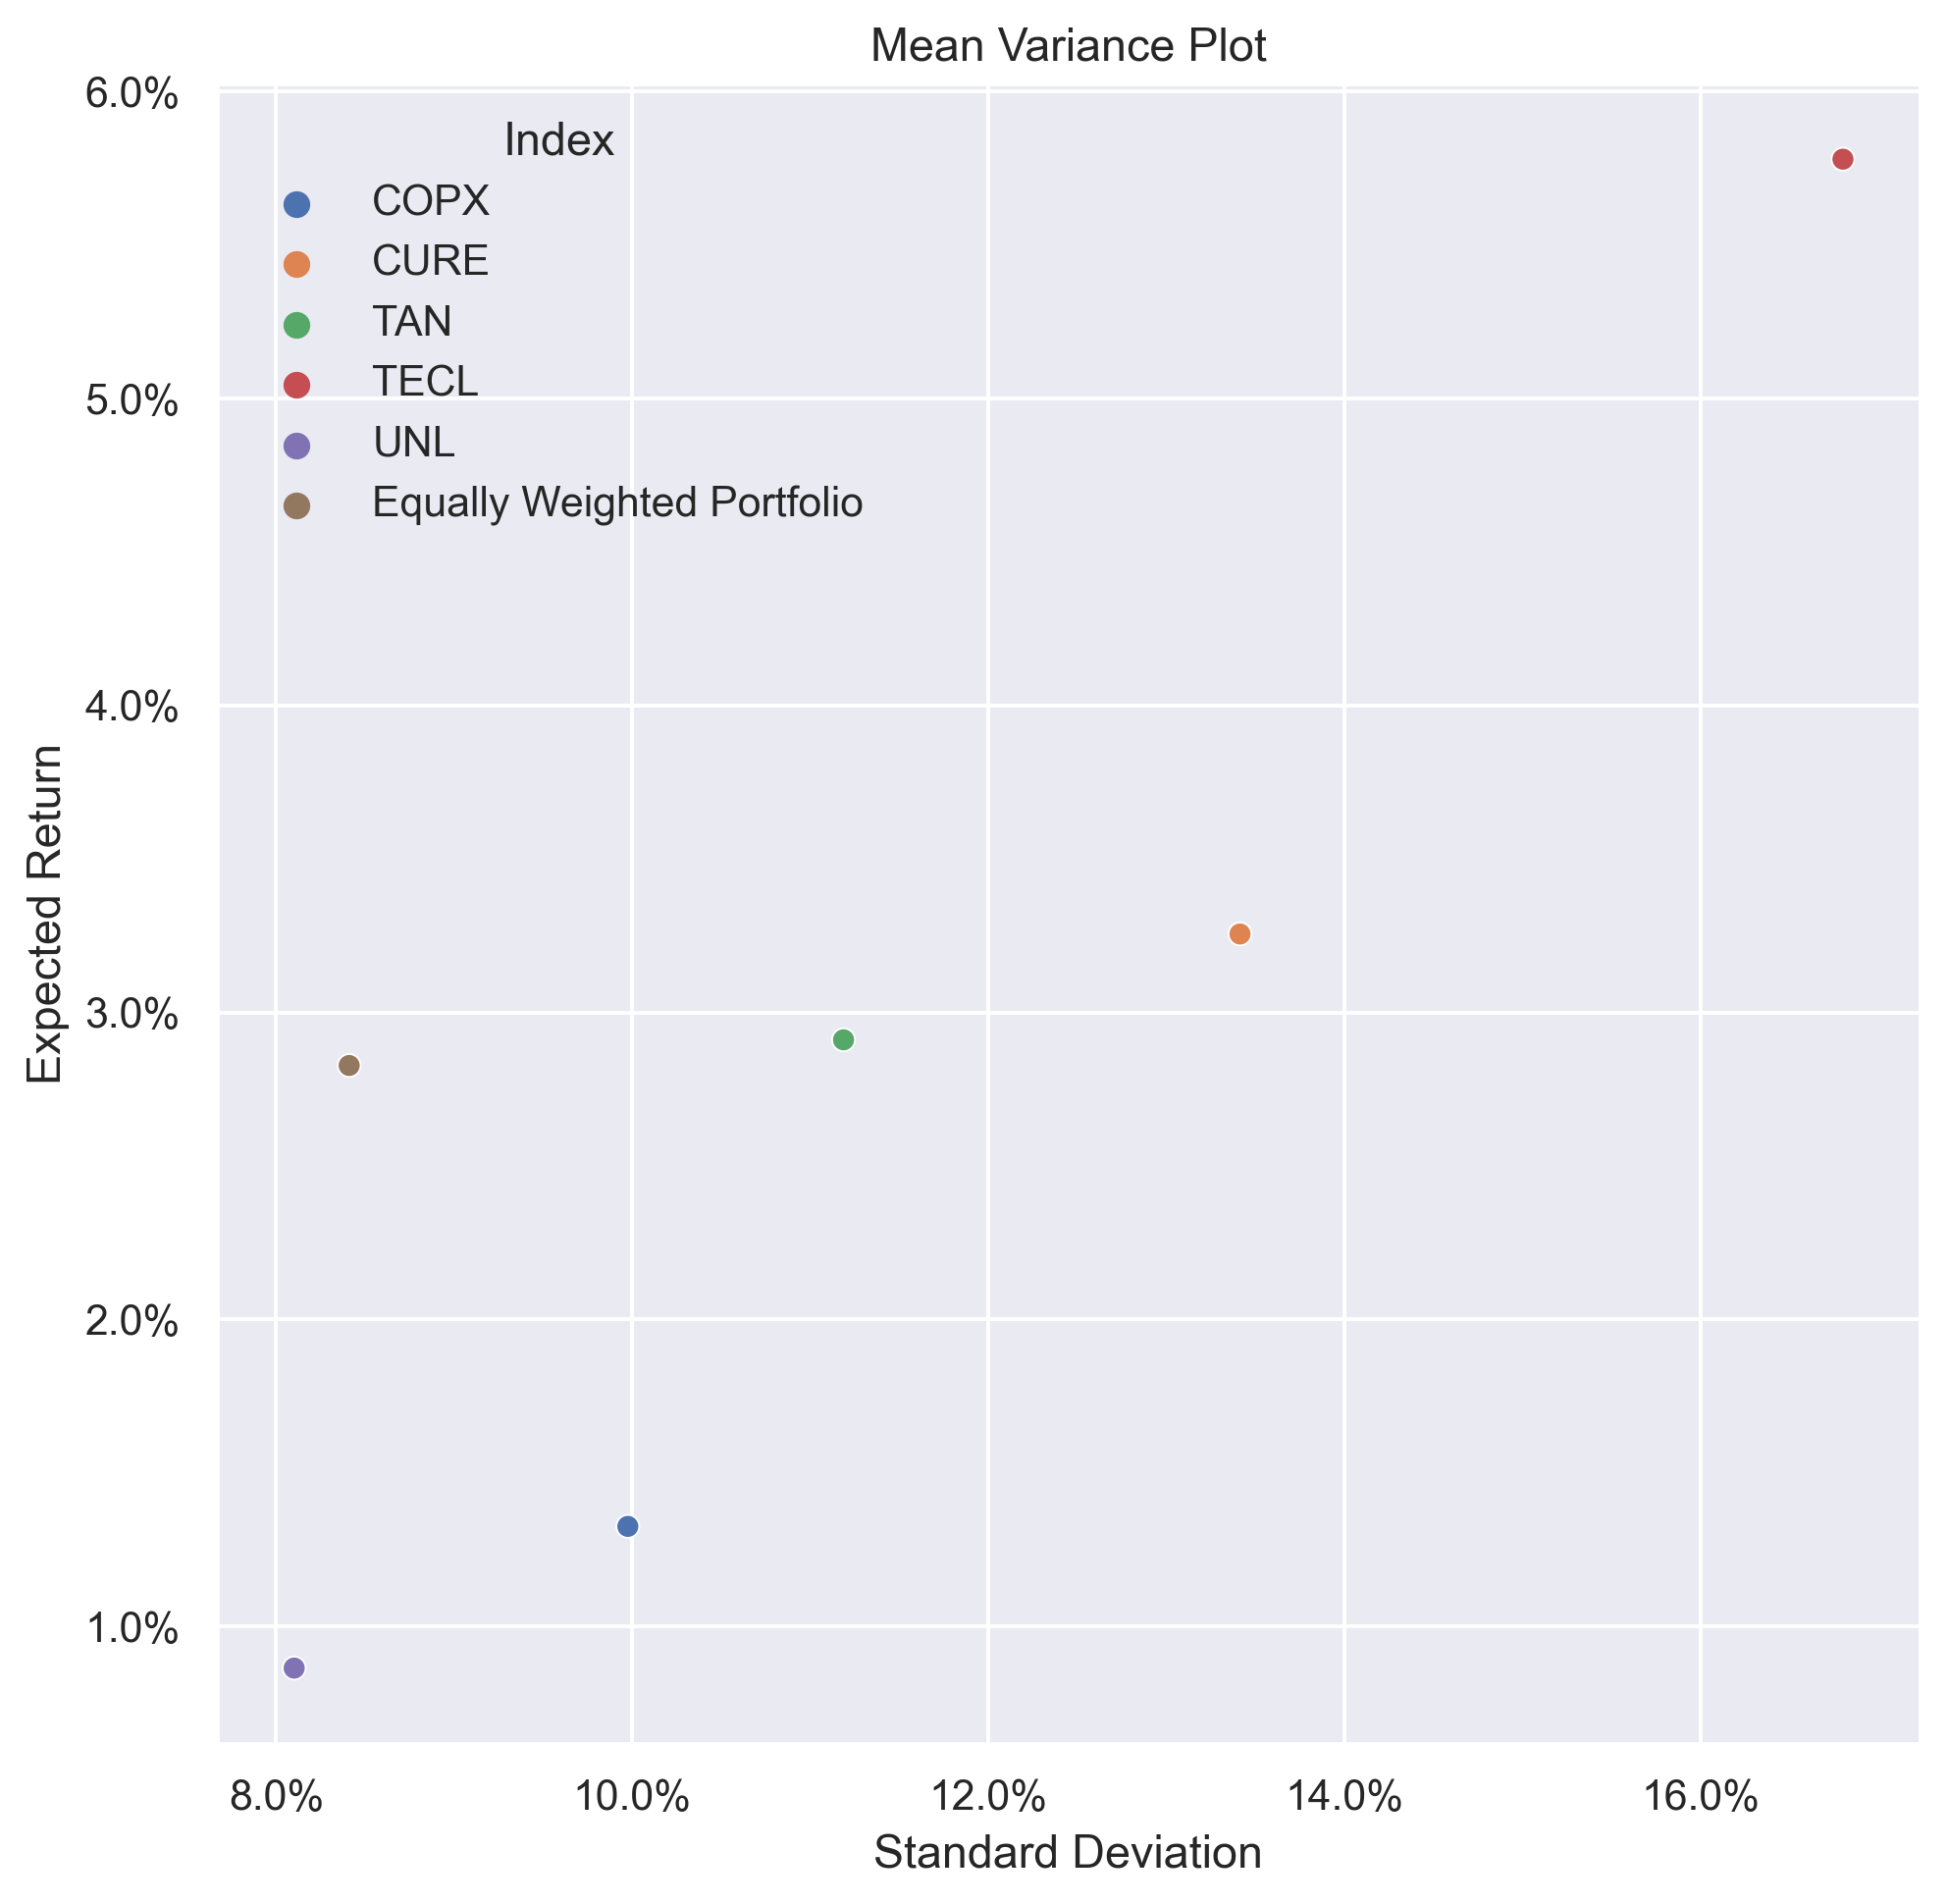

In [61]:
mean_var_plot = sns.scatterplot(
    data=mean_var, x="Standard Deviation", y="Expected Return", hue="Index"
).set(title="Mean Variance Plot")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 #### Globally Minimum Variance Portfolio

 $$
 \LARGE
 \begin{matrix}
 \notag
 \mu_{*} = \frac{ \mathbf{1}' \mathbf{V}^{-1} \mathbf{\mu} } {\mathbf{1}' \mathbf{V}^{-1} \mathbf{1}  } &
 \sigma_{*}^{2} = (\mathbf{1}' \mathbf{V}^{-1} \mathbf{1})^{-1} &
 w_{*} = \frac{\mathbf{V}^{-1} \mathbf{1}}{\mathbf{1}' \mathbf{V}^{-1} \mathbf{1}}
 \end{matrix}
 $$

In [62]:
mu = table_1["Arithmetic Mean"]
V = returns.cov(ddof=0)
one = np.ones((5, 1))

In [63]:
w_star = pd.DataFrame(
    np.linalg.inv(V).dot(one) / (one.T.dot(np.linalg.inv(V))).dot(one),
    index=returns.columns,
    columns=["w*"],
)
w_star

w*
COPX  0.216968
CURE  0.111532
TAN   0.202804
TECL -0.064152
UNL   0.532849

In [64]:
mu_star = (
    one.T.dot(np.linalg.inv(V)).dot(mu) / (one.T.dot(np.linalg.inv(V))).dot(one).item(0)
).item(0)
print("μ* =", f"{mu_star:,.3%} monthly")
print("μ* =", f"{((1+mu_star)**12)-1:,.3%} monthly")

μ* = 1.331% monthly
μ* = 17.193% monthly


In [65]:
var_star = np.linalg.inv((one.T.dot(np.linalg.inv(V))).dot(one)).item(0)
print("σ²* =", f"{var_star:.4f}")
print("σ* =", f"{np.sqrt(var_star):,.4%}")

σ²* = 0.0033
σ* = 5.7558%


 As reference let's add these points to our Mean Variance Plot

In [66]:
mean_var = mean_var.append(
    pd.Series(
        {
            "Index": "Global Minimum Variance Portfolio",
            "Expected Return": mu_star,
            "Standard Deviation": np.sqrt(var_star),
        }
    ),
    ignore_index=True,
)

In [67]:
with pd.option_context("display.float_format", PERCENT.format):
    display(mean_var)

Index  Expected Return  Standard Deviation
0                               COPX           1.326%              9.975%
1                               CURE           3.256%             13.413%
2                                TAN           2.911%             11.186%
3                               TECL           5.780%             16.799%
4                                UNL           0.864%              8.101%
5         Equally Weighted Portfolio           2.827%              8.410%
6  Global Minimum Variance Portfolio           1.331%              5.756%

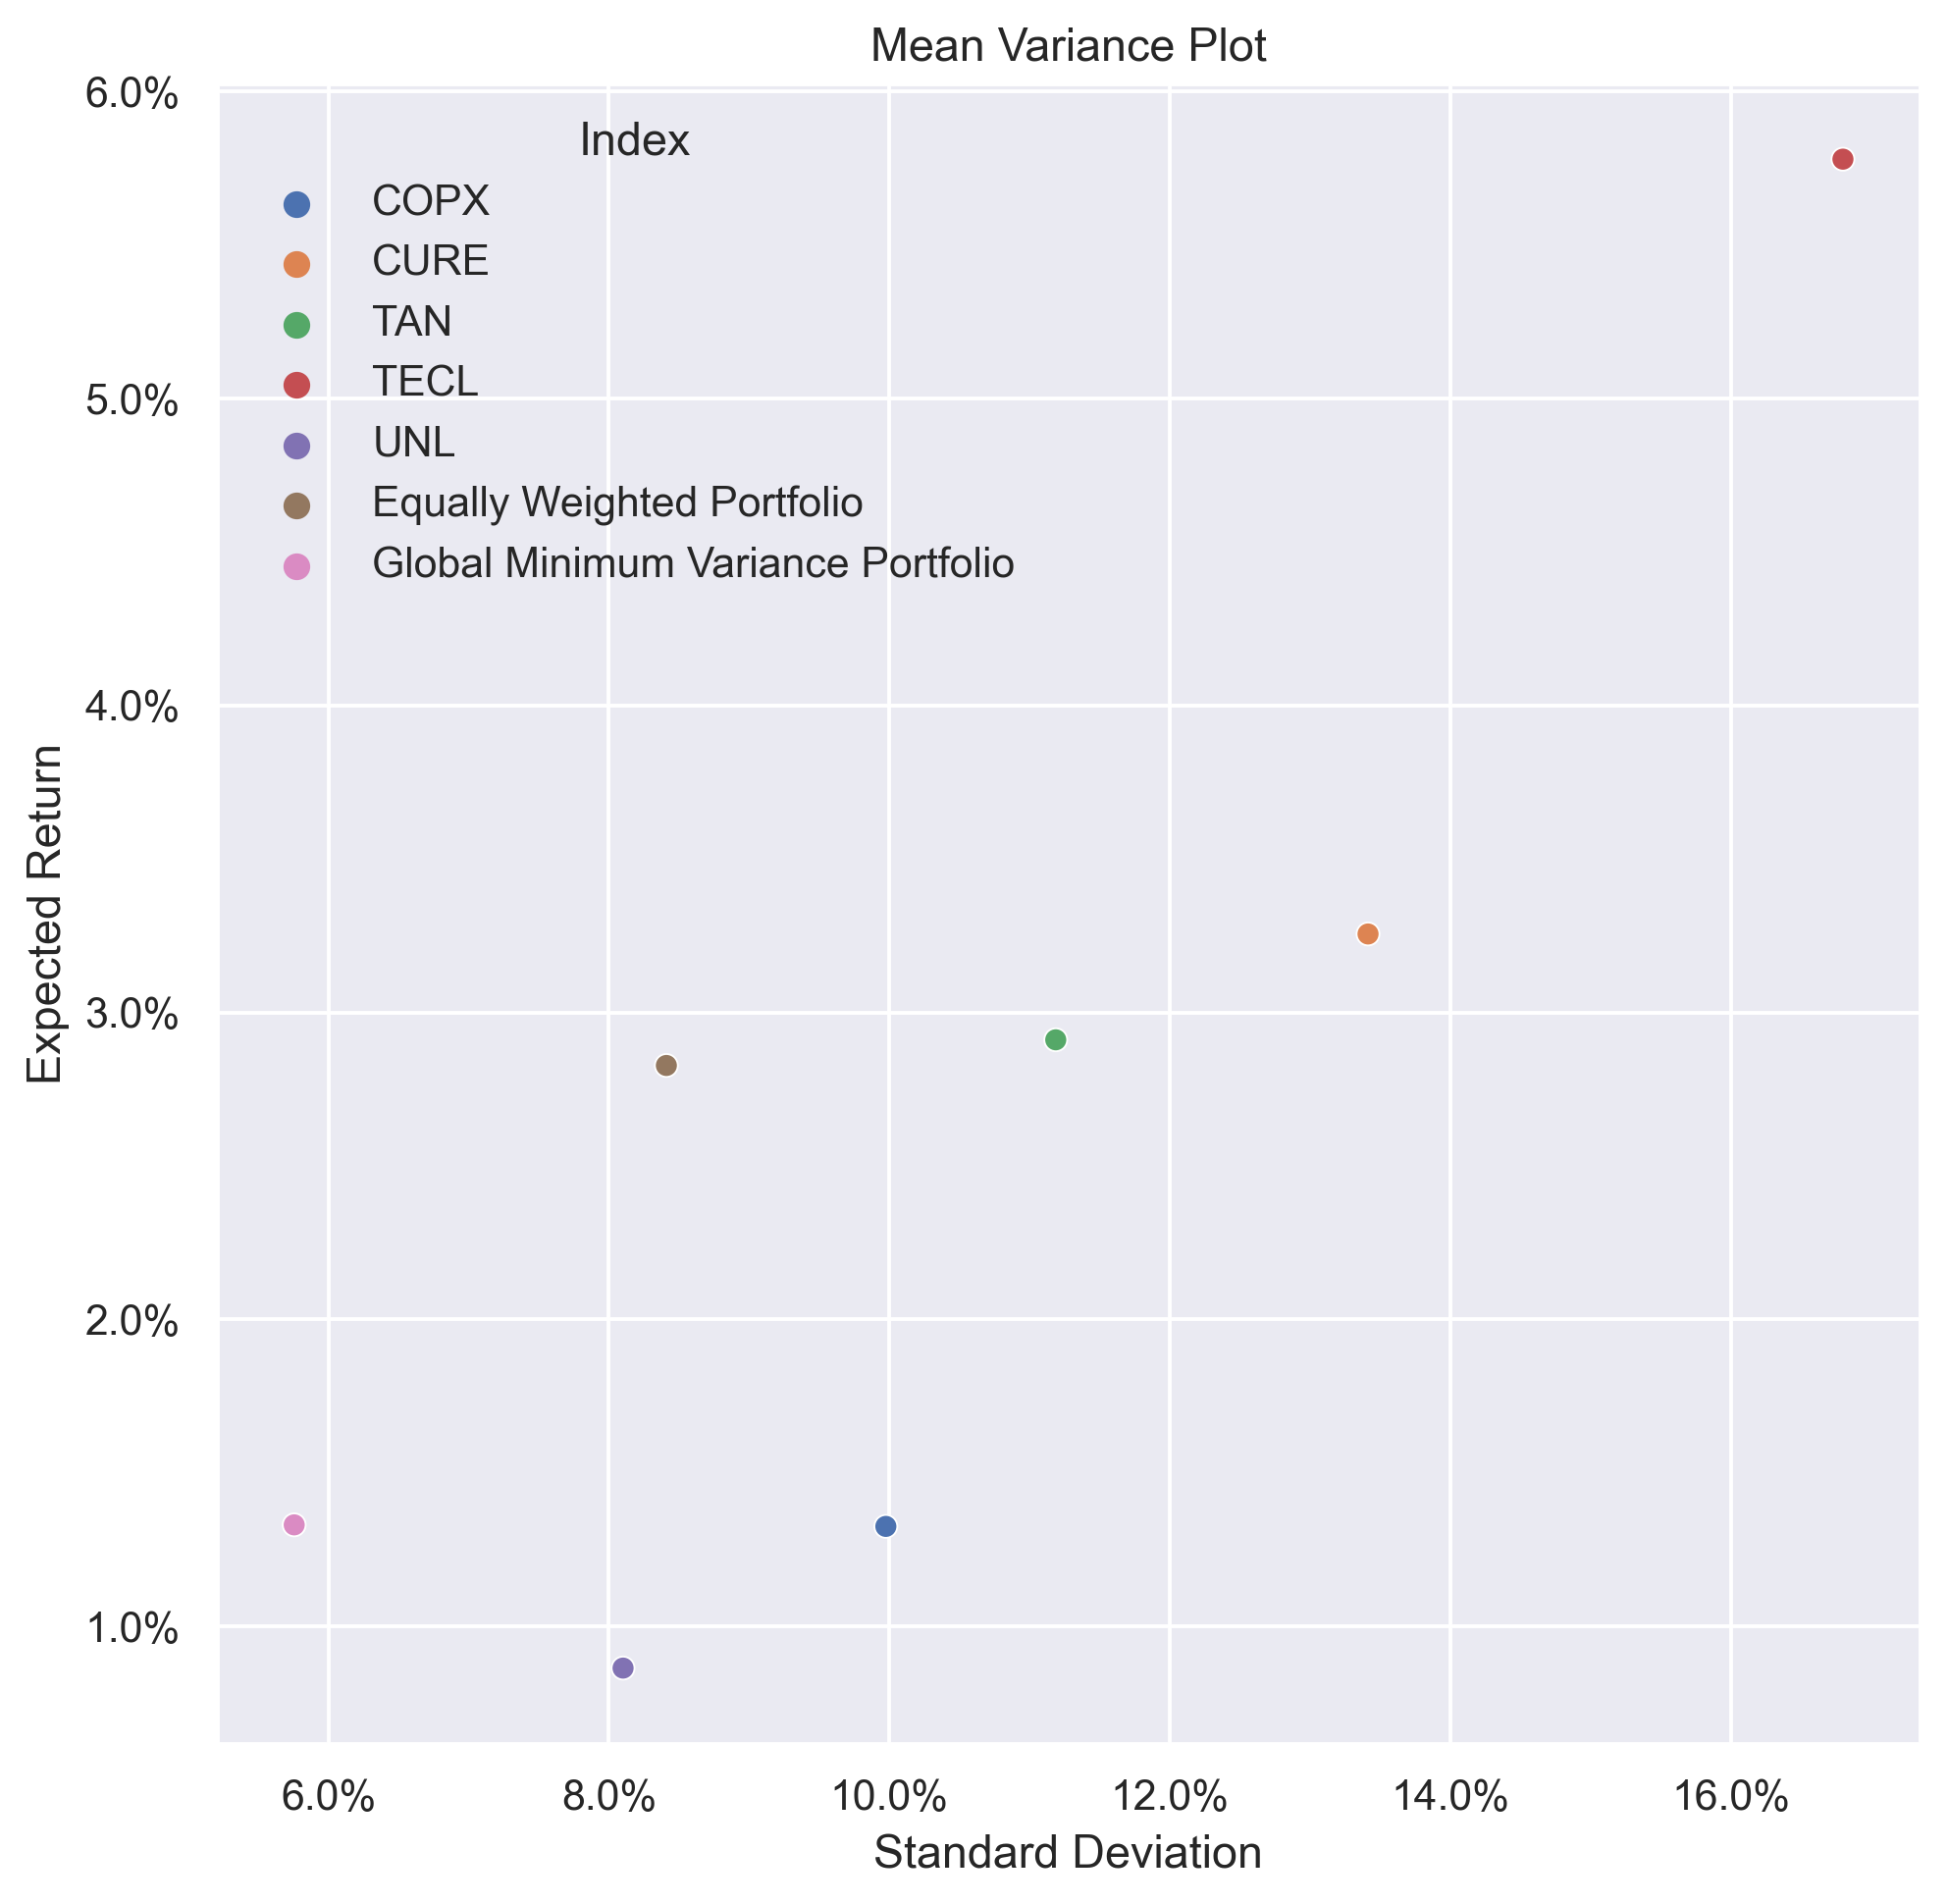

In [68]:
mean_var_plot = sns.scatterplot(
    data=mean_var, x="Standard Deviation", y="Expected Return", hue="Index"
).set(title="Mean Variance Plot")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 ### B. Graph 3: Mean-Variance Frontier

 Using the matrix Excel-based techniques learned in class, use the five funds
 and their statistics to derive the mean-variance frontier. Draw a plot showing
 the frontier as well as the 5 mean-variance points of the five individual
 funds.

 **Efficient Portfolio Frontier**
 $$
 \Large
 \sigma^{2}_{p} = \begin{bmatrix}E(R_p) \\ 1 \end{bmatrix}'  \left(\begin{bmatrix}\mu_i & 1 \\ \vdots & \vdots \\ \mu_n & 1\end{bmatrix}' \mathbf{V}^{-1} \begin{bmatrix}\mu_i & 1 \\ \vdots & \vdots \\ \mu_n & 1\end{bmatrix}\right)^{-1} \begin{bmatrix}E(R_p) \\ 1\end{bmatrix}
 $$

 **Optimal Weights**
 $$
 \Large
 \underbrace{w}_{n \times 1} = \underbrace{\underbrace{\underbrace{\mathbf{V}^{-1}}_{n \times n} \cdot \underbrace{\begin{bmatrix}\mu_i & 1 \\ \vdots & \vdots \\ \mu_n & 1\end{bmatrix}}_{n \times 2} \cdot }_{n \times 2}\underbrace{\left(\underbrace{\begin{bmatrix}\mu_i & 1 \\ \vdots & \vdots \\ \mu_n & 1\end{bmatrix}'}_{2 \times n} \cdot \underbrace{\mathbf{V}^{-1}}_{n \times n} \cdot \underbrace{\begin{bmatrix}\mu_i & 1 \\ \vdots & \vdots \\ \mu_n & 1\end{bmatrix}}_{n \times 2}\right)^{-1}}_{2 \times 2} \cdot \underbrace{\begin{bmatrix}E(R_p) \\ 1\end{bmatrix}}_{2 \times 1}}_{n \times 1}
 $$

 I will convert all returns into annual returns to better interpret and
 visualize results:

In [69]:
def mean_variance_frontier(required_return: float, timeframe="Y", df=returns):
    if timeframe == "Y":
        mu = ((1 + returns.mean()) ** 12) - 1
        V_inv = np.linalg.inv(df.cov(ddof=0) * 12)
    else:
        V_inv = np.linalg.inv(df.cov(ddof=0))
        mu = df.mean()

    ones = np.ones(len(df.columns))
    mu_one = np.column_stack((mu, ones))

    factor_1 = V_inv.dot(mu_one)
    factor_2 = np.linalg.inv((mu_one.T.dot(V_inv)).dot(mu_one))
    required_vector = np.array([[required_return], [1]])

    w = np.squeeze((factor_1.dot(factor_2)).dot(required_vector))
    expected_return = np.squeeze(w.T.dot(mu)).item(0)
    sigma = np.squeeze(
        np.sqrt((required_vector.T.dot(factor_2)).dot(required_vector))
    ).item(0)

    mean_var = pd.DataFrame((expected_return, sigma)).T
    mean_var.columns = ["E(Rp)", "SD(p)"]

    return functools.reduce(operator.iconcat, [[expected_return, sigma], w], [])

In [70]:
def frontier_df(required_return):
    frontier = [mean_variance_frontier(i) for i in np.linspace(0, required_return, 500)]
    frontier_pd = pd.DataFrame(frontier)
    frontier_pd.columns = functools.reduce(
        operator.iconcat, [["E(Rp)", "SD(P)"], returns.columns], []
    )

    return frontier_pd

In [71]:
frontier = frontier_df(0.4)

with pd.option_context("display.float_format", PERCENT.format):
    display(frontier)

E(Rp)   SD(P)    COPX    CURE     TAN     TECL     UNL
0   -0.000% 22.244% 42.588% 14.395% 18.784% -28.574% 52.808%
1    0.080% 22.223% 42.489% 14.379% 18.791% -28.469% 52.810%
2    0.160% 22.203% 42.389% 14.364% 18.798% -28.364% 52.813%
3    0.240% 22.182% 42.290% 14.349% 18.805% -28.259% 52.815%
4    0.321% 22.162% 42.191% 14.333% 18.812% -28.154% 52.817%
..      ...     ...     ...     ...     ...      ...     ...
495 39.679% 23.962% -6.458%  6.785% 22.298%  23.449% 53.927%
496 39.760% 23.988% -6.557%  6.769% 22.305%  23.554% 53.930%
497 39.840% 24.014% -6.657%  6.754% 22.312%  23.659% 53.932%
498 39.920% 24.040% -6.756%  6.738% 22.319%  23.764% 53.934%
499 40.000% 24.066% -6.855%  6.723% 22.326%  23.869% 53.936%

[500 rows x 7 columns]

In [72]:
annual_mean_var = mean_var.copy()

In [73]:
annual_mean_var["Expected Return"] = (
    (annual_mean_var["Expected Return"] + 1) ** 12
) - 1

In [74]:
annual_mean_var["Standard Deviation"] = annual_mean_var["Standard Deviation"] * (
    12 ** 0.5
)

In [75]:
with pd.option_context("display.float_format", PERCENT.format):
    display(annual_mean_var)

Index  Expected Return  Standard Deviation
0                               COPX          17.123%             34.553%
1                               CURE          46.883%             46.464%
2                                TAN          41.105%             38.750%
3                               TECL          96.264%             58.195%
4                                UNL          10.878%             28.062%
5         Equally Weighted Portfolio          39.735%             29.132%
6  Global Minimum Variance Portfolio          17.193%             19.939%

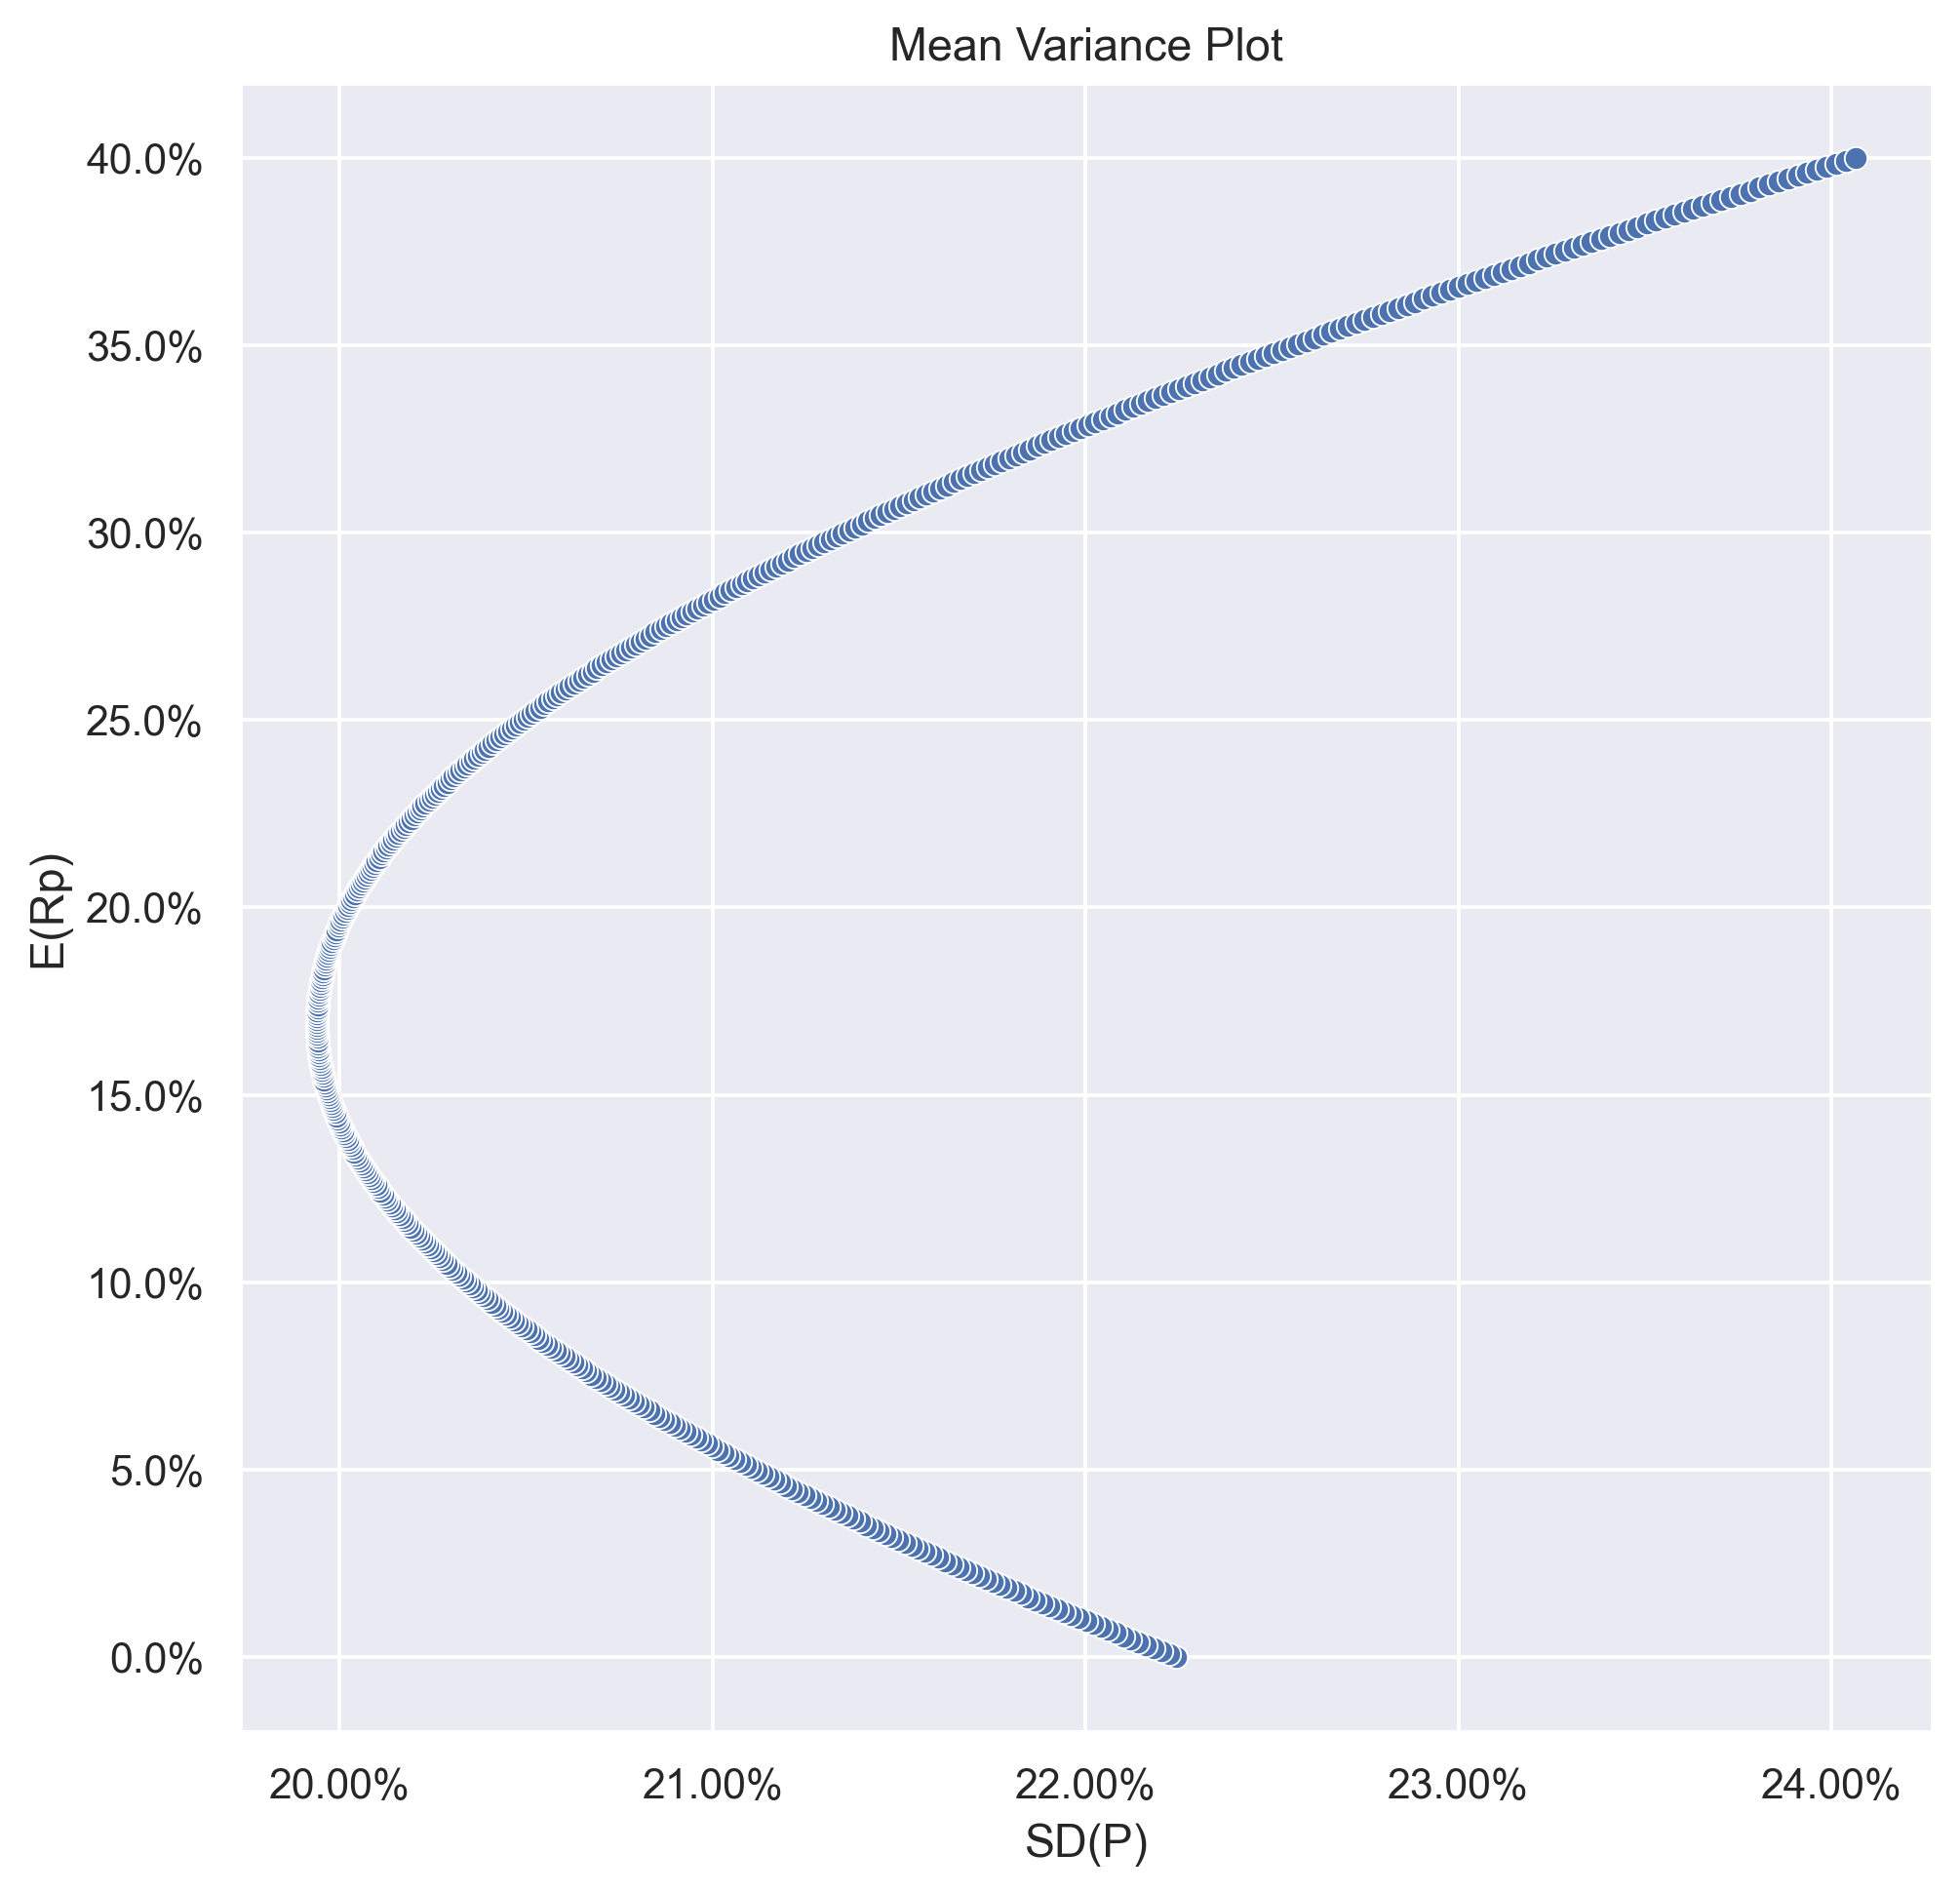

In [76]:
mean_var_plot = sns.scatterplot(data=frontier_df(0.4), x="SD(P)", y="E(Rp)").set(
    title="Mean Variance Plot"
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 Since the annual return for one of my funds is nearly 100%, the shape of this
 frontier compared to each fund looks strange.

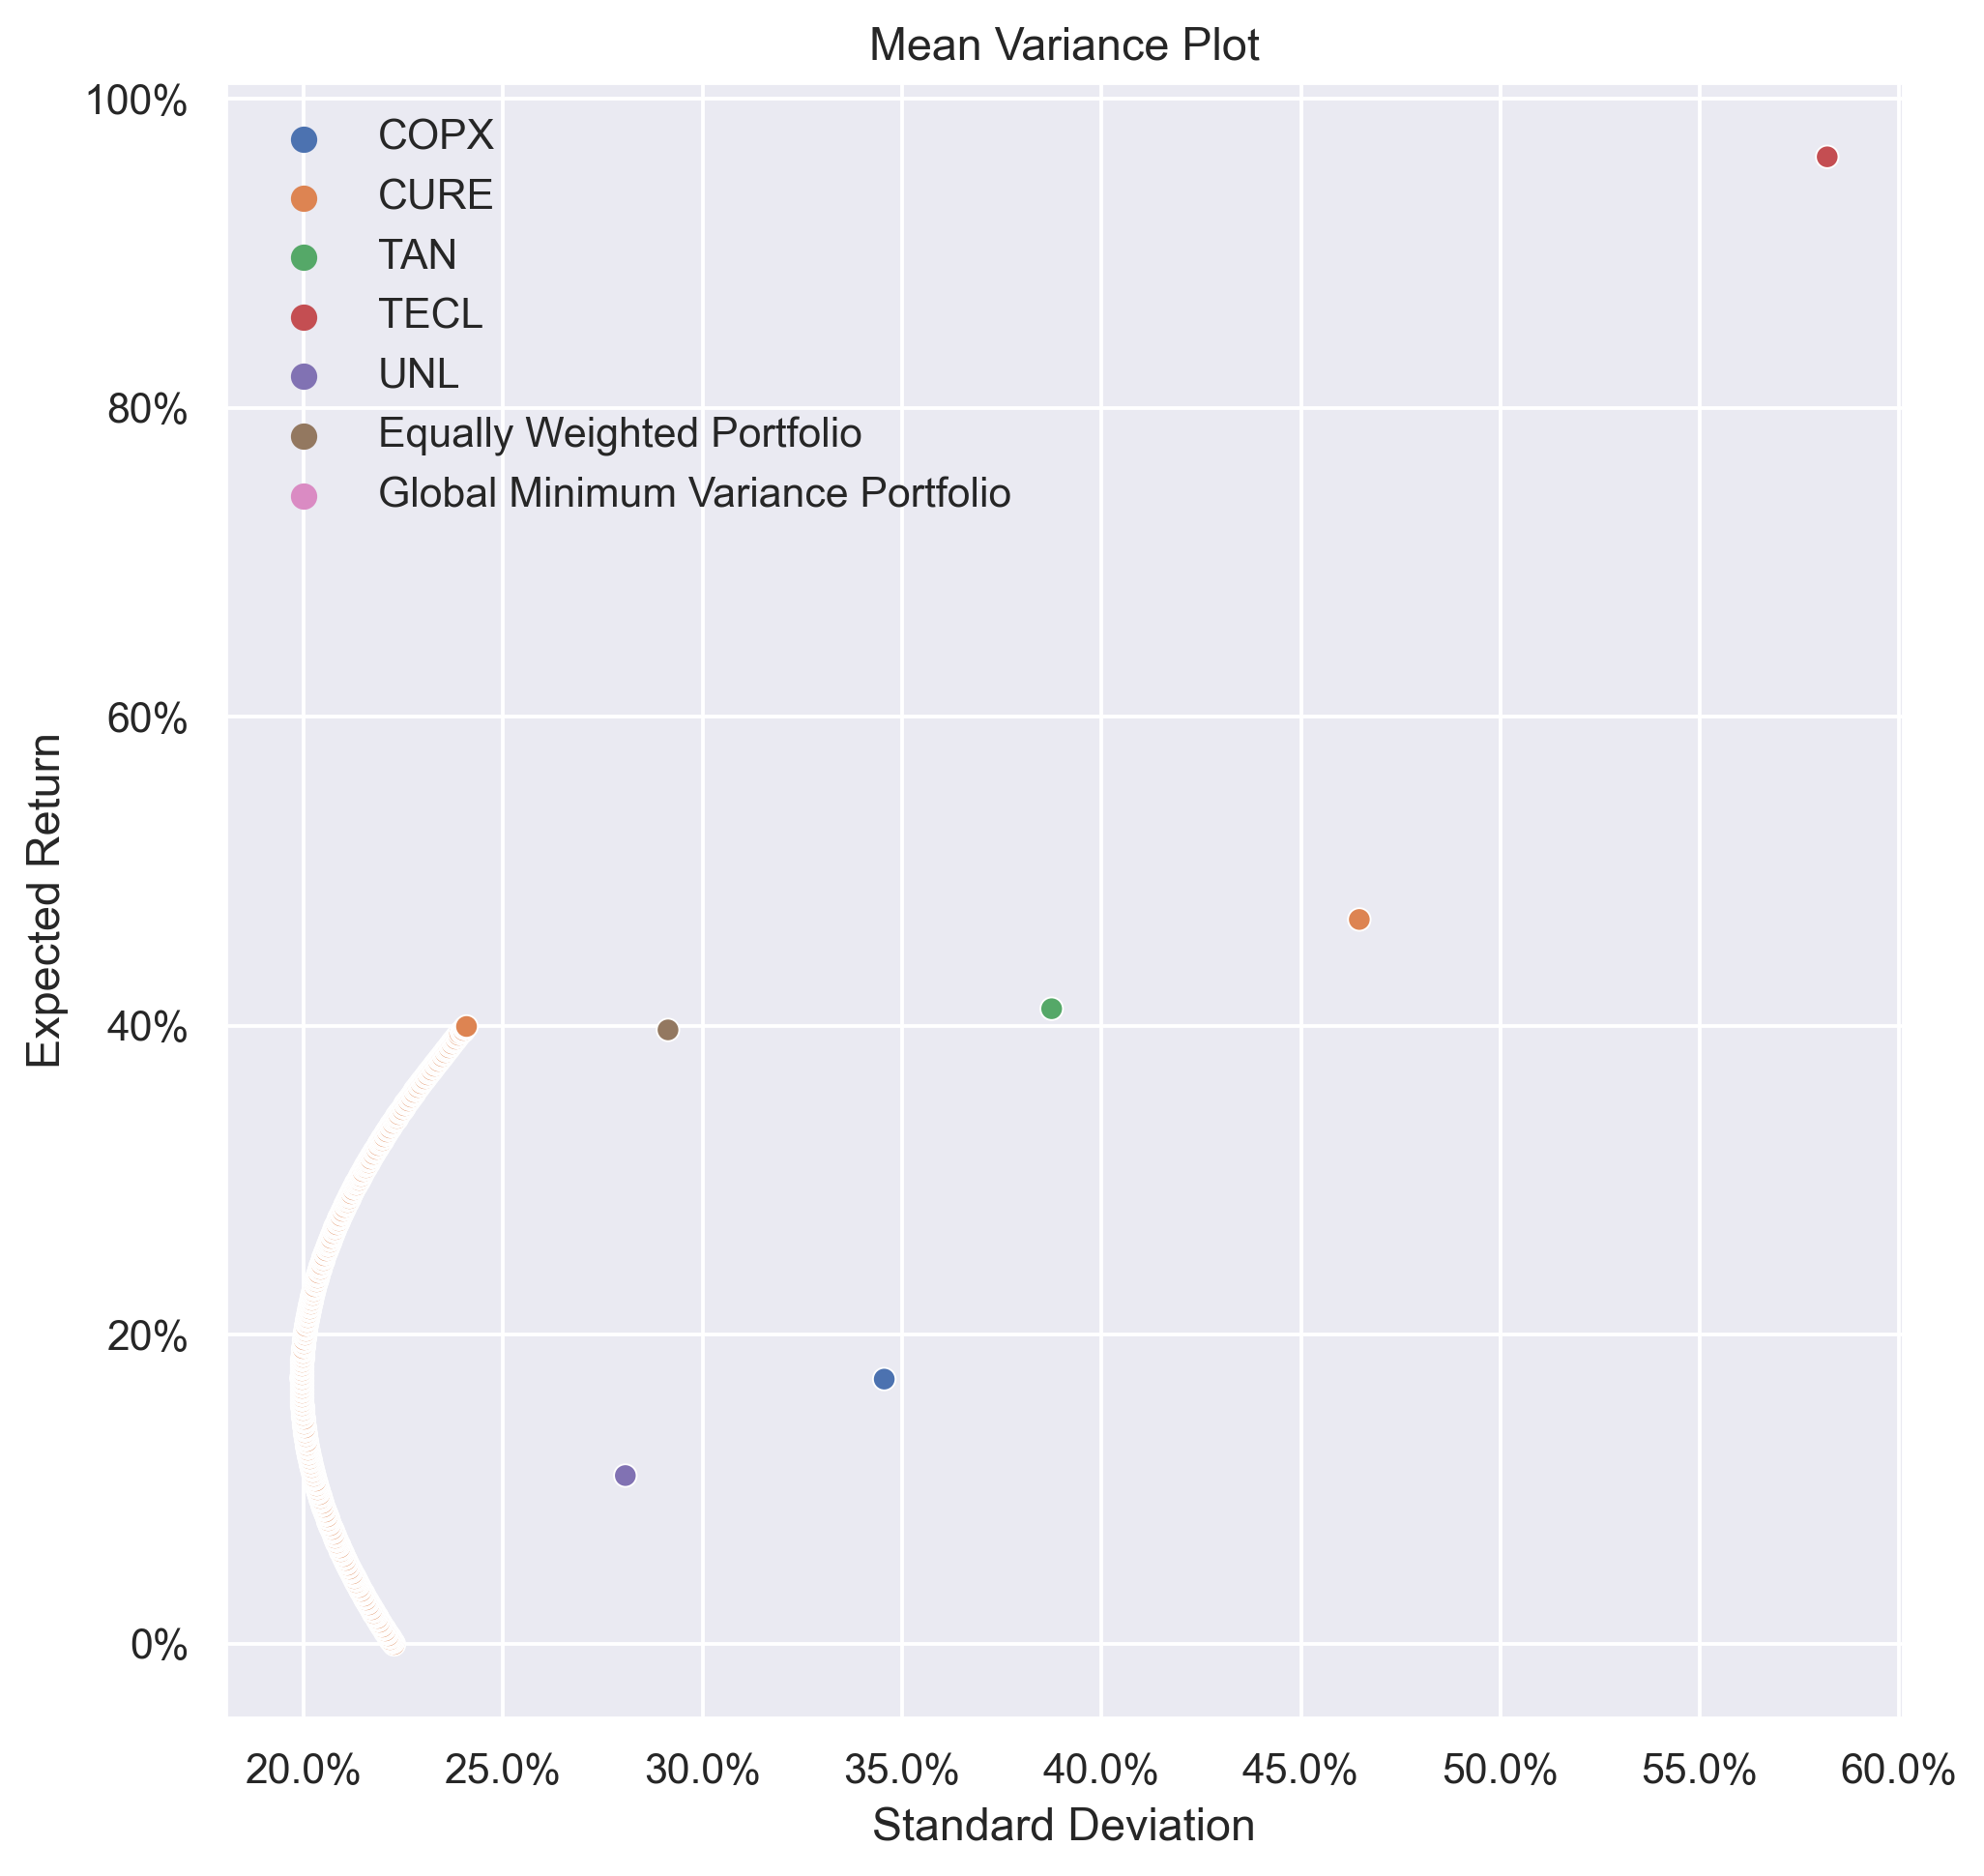

In [77]:
sns.scatterplot(
    data=annual_mean_var, x="Standard Deviation", y="Expected Return", hue="Index"
).set(title="Mean Variance Plot")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

mean_var_plot = sns.scatterplot(data=frontier, x="SD(P)", y="E(Rp)").set(
    title="Mean Variance Plot"
)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 #### Random Portfolios

 We can also generate random portfolios by the following:

In [78]:
port_returns = []
port_sd = []
port_w = []

num_assets = len(funds)
num_portfolios = 10000

In [79]:
for _ in range(num_portfolios):
    # Random generation of weights
    weights = np.random.random(num_assets)
    # Normalization of weights
    weights = weights / np.sum(weights)
    port_w.append(weights)

    port_returns.append(np.dot(weights, ((1 + returns.mean()) ** 12) - 1))
    port_var = (
        12 * returns.cov(ddof=0).mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    )
    sd_port = np.sqrt(port_var)
    port_sd.append(sd_port)

In [80]:
data = {"Expected Return": port_returns, "Standard Deviation": port_sd}

for counter, symbol in enumerate(returns.columns.tolist()):
    data[symbol] = [w[counter] for w in port_w]

In [81]:
randomPortfolios = pd.DataFrame(data)

In [82]:
randomPortfolios.head()

Expected Return  Standard Deviation      COPX      CURE       TAN  \
0         0.360461            0.303170  0.276140  0.357432  0.225173   
1         0.573129            0.373718  0.091265  0.077072  0.445247   
2         0.364048            0.298462  0.280670  0.330658  0.204899   
3         0.378374            0.291082  0.235345  0.331516  0.142778   
4         0.423337            0.285114  0.153722  0.246766  0.145126   

       TECL       UNL  
0  0.044128  0.097127  
1  0.347031  0.039385  
2  0.066465  0.117308  
3  0.108187  0.182174  
4  0.201722  0.252664

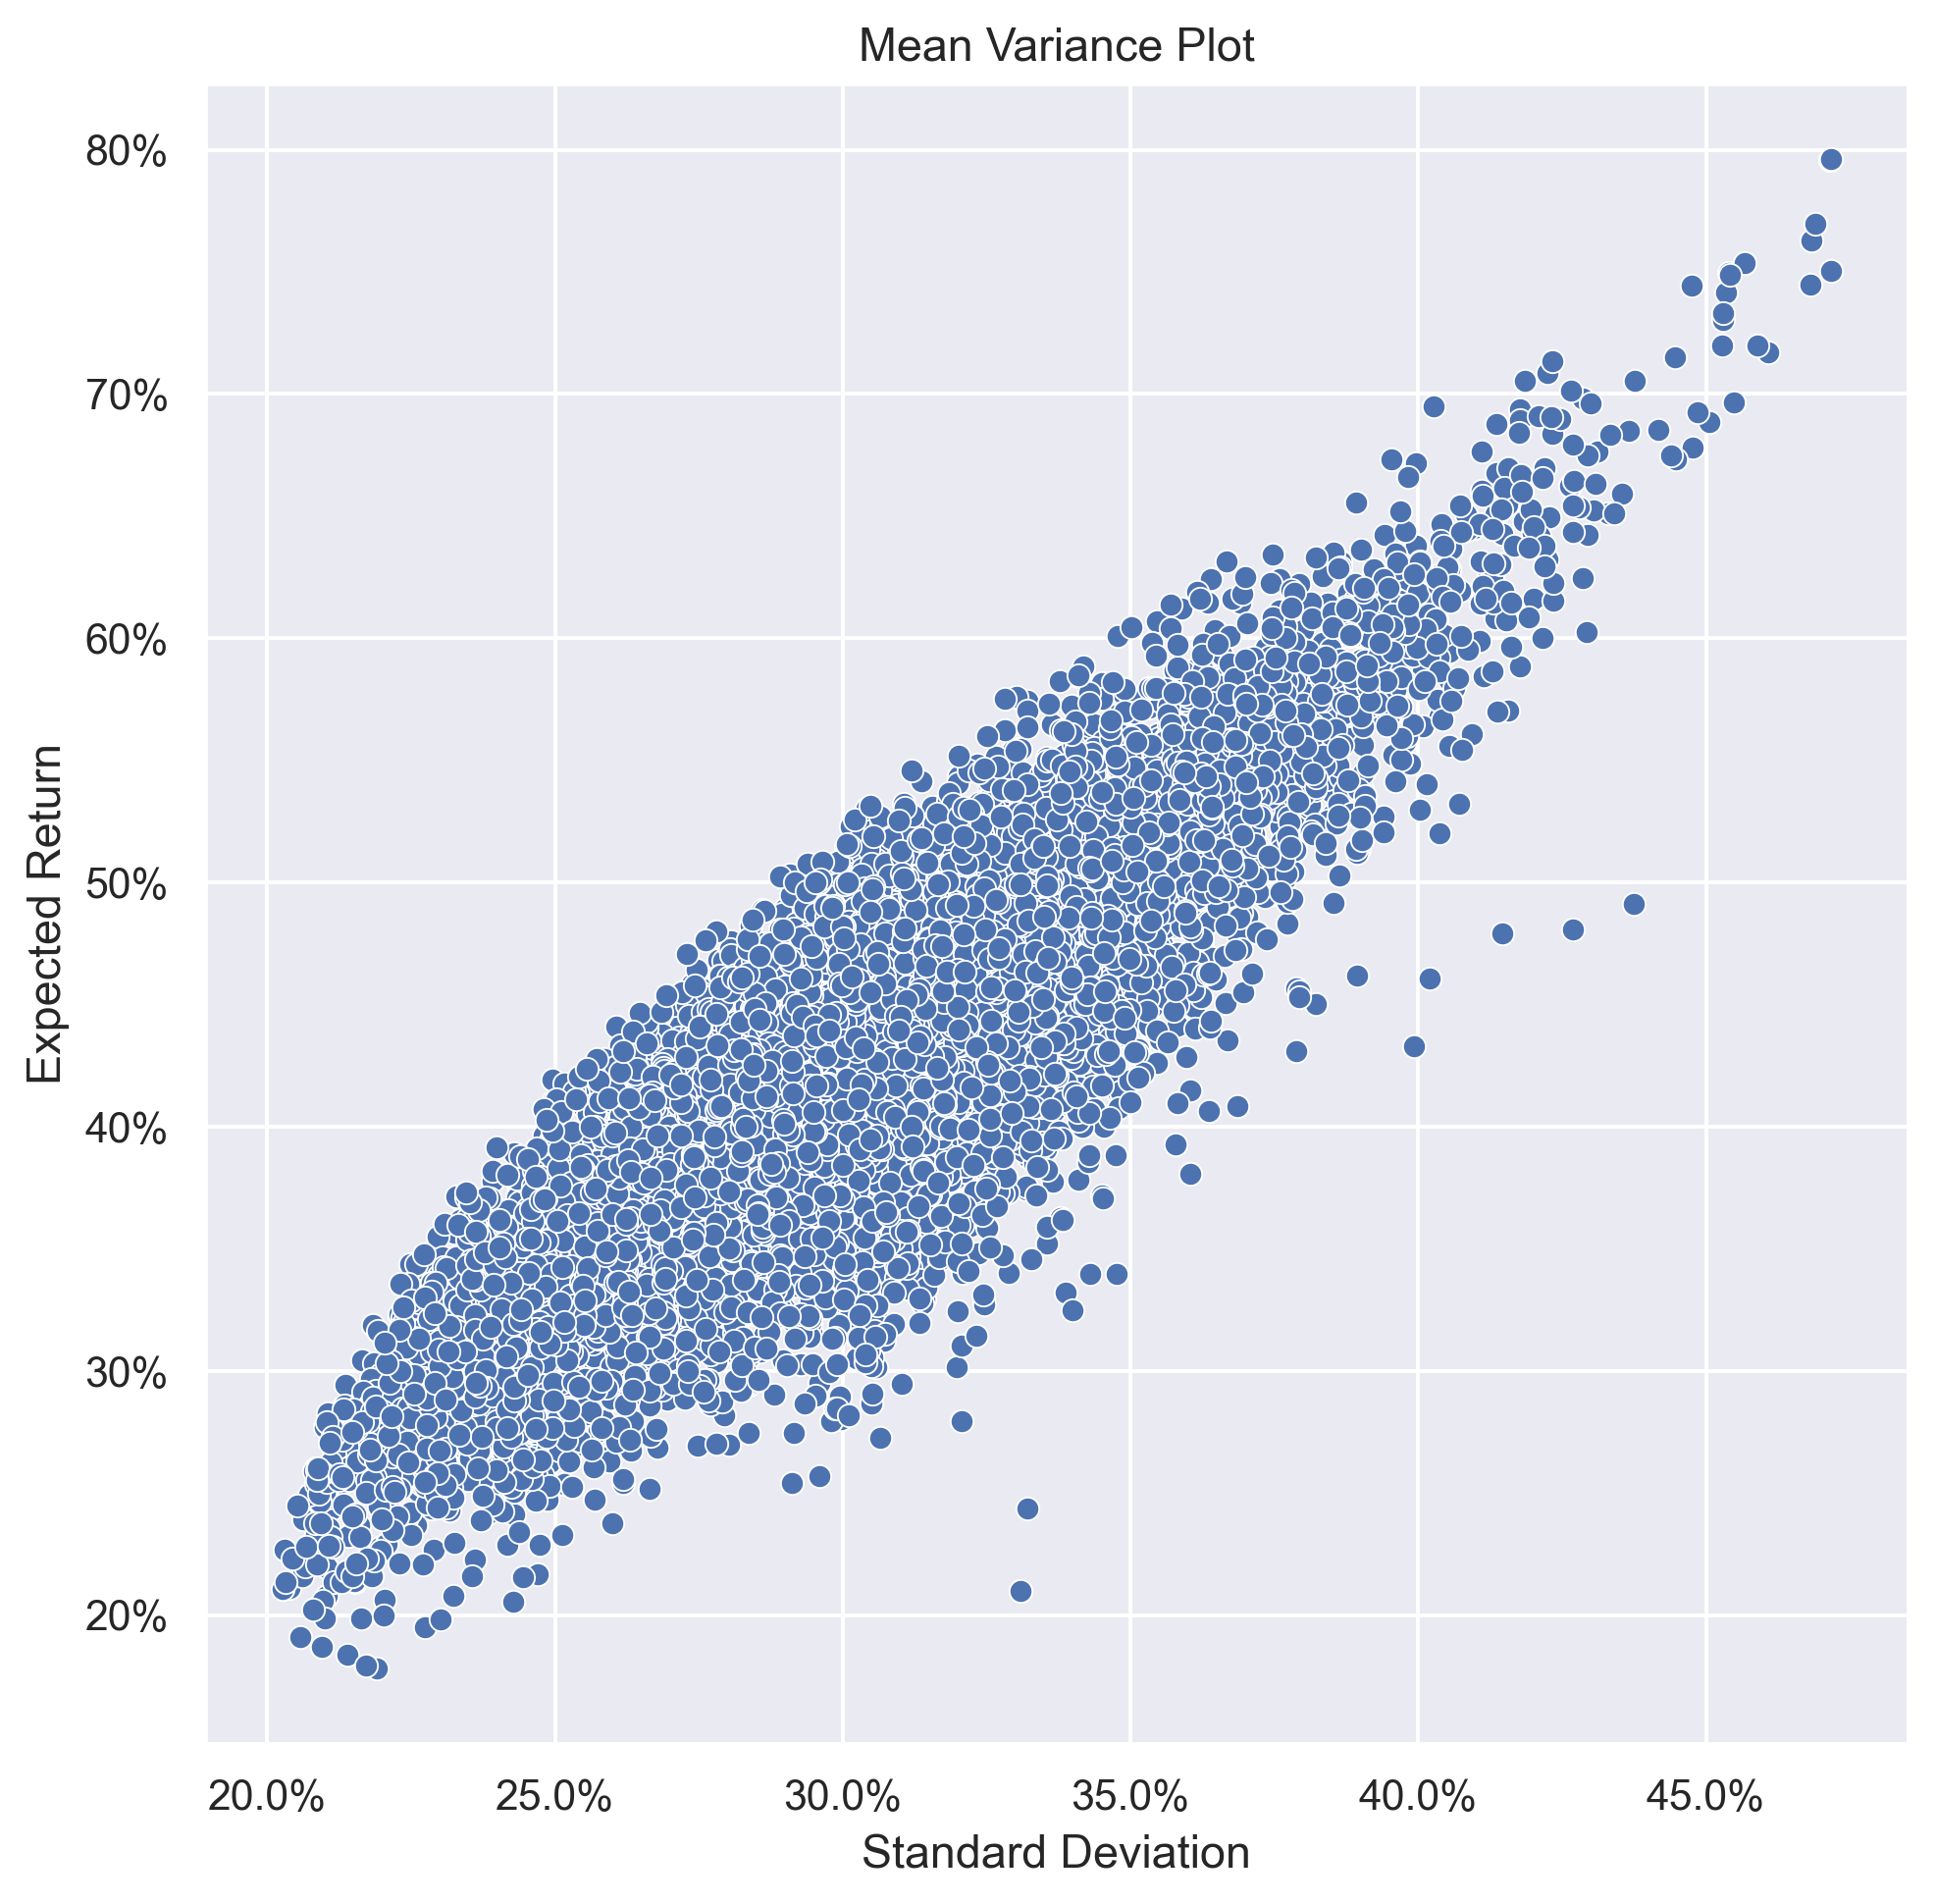

In [83]:
mean_var_plot = sns.scatterplot(
    data=randomPortfolios,
    x="Standard Deviation",
    y="Expected Return",
).set(title="Mean Variance Plot")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 ##### Minimum Volatility

In [84]:
# idxmin() gives us the min value per column specified
min_vol_port = randomPortfolios.iloc[randomPortfolios["Standard Deviation"].idxmin()]
min_vol_port = min_vol_port.to_frame().T
min_vol_port.index = ["Random Minimum Variance Portfolio"]

In [85]:
min_vol_port

Expected Return  Standard Deviation  \
Random Minimum Variance Portfolio         0.210639             0.20265   

                                       COPX      CURE       TAN      TECL  \
Random Minimum Variance Portfolio  0.199777  0.033067  0.239106  0.006092   

                                        UNL  
Random Minimum Variance Portfolio  0.521958

 Interesting, this minimum random portfolio beat our minimum variance portfolio
 in terms of expected return but not in minimizing volatility. Yet, it doesn't
 incur in short-selling.

In [86]:
display(annual_mean_var, w_star)

Index  Expected Return  Standard Deviation
0                               COPX         0.171231            0.345534
1                               CURE         0.468831            0.464639
2                                TAN         0.411050            0.387503
3                               TECL         0.962637            0.581947
4                                UNL         0.108781            0.280623
5         Equally Weighted Portfolio         0.397346            0.291318
6  Global Minimum Variance Portfolio         0.171927            0.199388

w*
COPX  0.216968
CURE  0.111532
TAN   0.202804
TECL -0.064152
UNL   0.532849

 ##### Minimum Volatility

In [87]:
annual_RiskFree = riskFree * 12
optimal_risky_port = randomPortfolios.iloc[
    (
        (randomPortfolios["Expected Return"] - annual_RiskFree)
        / randomPortfolios["Standard Deviation"]
    ).idxmax()
]

optimal_risky_port = optimal_risky_port.to_frame().T
optimal_risky_port.index = ["Random Maximum Sharpe Ratio Portfolio"]

In [88]:
optimal_risky_port

Expected Return  Standard Deviation  \
Random Maximum Sharpe Ratio Portfolio         0.575313            0.328215   

                                           COPX     CURE       TAN      TECL  \
Random Maximum Sharpe Ratio Portfolio  0.016292  0.00279  0.144486  0.492866   

                                            UNL  
Random Maximum Sharpe Ratio Portfolio  0.343566

In [89]:
annual_mean_var = pd.concat(
    [
        annual_mean_var.set_index("Index"),
        min_vol_port[["Expected Return", "Standard Deviation"]],
        optimal_risky_port[["Expected Return", "Standard Deviation"]],
    ]
).reset_index()

In [90]:
annual_mean_var.columns = ["Index", "Expected Return", "Standard Deviation"]

In [91]:
with pd.option_context("display.float_format", PERCENT.format):
    display(annual_mean_var)

Index  Expected Return  Standard Deviation
0                                   COPX          17.123%             34.553%
1                                   CURE          46.883%             46.464%
2                                    TAN          41.105%             38.750%
3                                   TECL          96.264%             58.195%
4                                    UNL          10.878%             28.062%
5             Equally Weighted Portfolio          39.735%             29.132%
6      Global Minimum Variance Portfolio          17.193%             19.939%
7      Random Minimum Variance Portfolio          21.064%             20.265%
8  Random Maximum Sharpe Ratio Portfolio          57.531%             32.822%

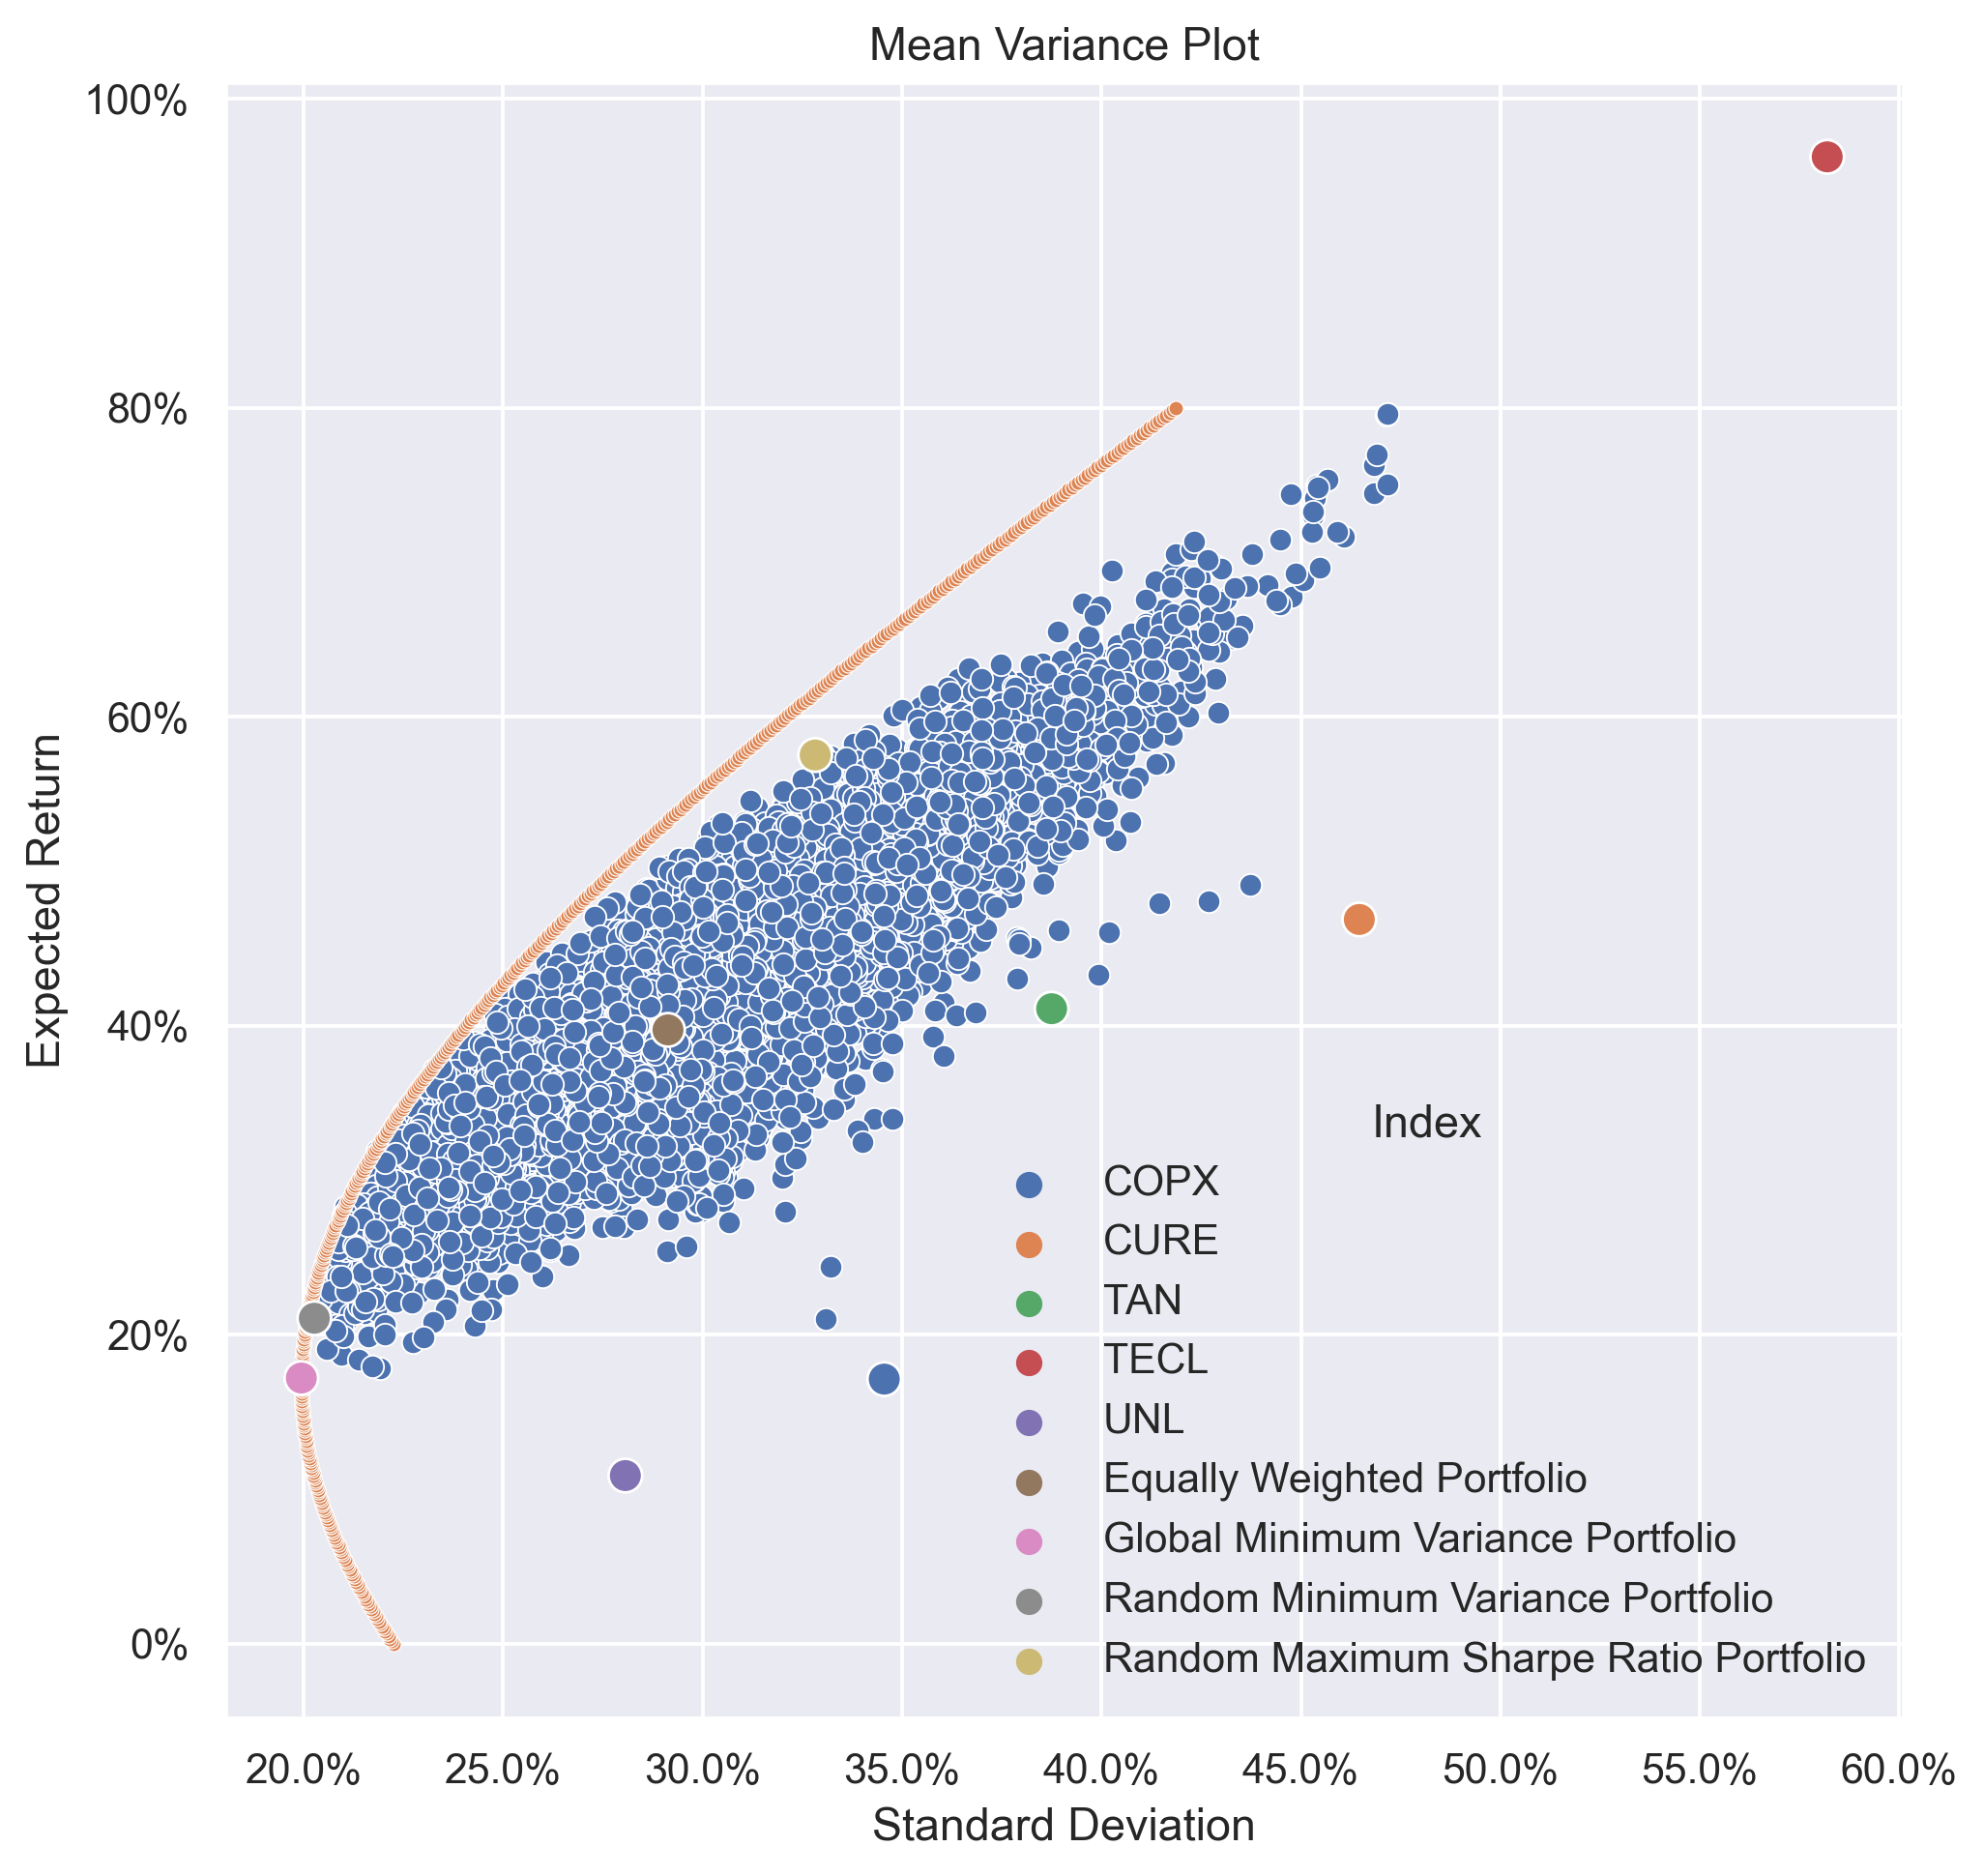

In [92]:
mean_var_plot = sns.scatterplot(
    data=randomPortfolios,
    x="Standard Deviation",
    y="Expected Return",
).set(title="Mean Variance Plot")


sns.scatterplot(data=frontier_df(0.8), x="SD(P)", y="E(Rp)", s=15).set(
    title="Mean Variance Plot"
)

results_plot = sns.scatterplot(
    data=annual_mean_var, x="Standard Deviation", y="Expected Return", hue="Index", s=80
).set(title="Mean Variance Plot")

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1))

 After looking at this graph we can see that while the randomly generated
 Maximum Sharpe Ratio Portfolio lies outside the frontier, it is likely (at
 least I think so) that this is due to the lack of constraint of short-seling
 in the mean variance frontier matrix formulation

 ## Part 5: Performance

 Rank the performance of the five funds and the five-fund portfolio according
 to the following criteria:

 - The Sharpe Measure
 - The Treynor Measure
 - Geometric Mean Return

 ### Sharpe Measure

 > Note: The textbook claims the following:


 ![image](https://user-images.githubusercontent.com/13838845/153757379-29865a3b-f999-44b5-b9bd-4e6b648a2e2f.png)

 $$
 \text{Sharpe Measure} = \frac{\overline{R} - R_f}{\sigma}
 $$

In [93]:
with pd.option_context("display.float_format", PERCENT.format):
    display(annual_mean_var.set_index("Index"))

Expected Return  Standard Deviation
Index                                                                     
COPX                                           17.123%             34.553%
CURE                                           46.883%             46.464%
TAN                                            41.105%             38.750%
TECL                                           96.264%             58.195%
UNL                                            10.878%             28.062%
Equally Weighted Portfolio                     39.735%             29.132%
Global Minimum Variance Portfolio              17.193%             19.939%
Random Minimum Variance Portfolio              21.064%             20.265%
Random Maximum Sharpe Ratio Portfolio          57.531%             32.822%

In [94]:
annual_mean_var["Sharpe Ratio"] = (
    annual_mean_var["Expected Return"] - annual_RiskFree
) / annual_mean_var["Standard Deviation"]

 ### Treynor Measure

 $$
 \text{Treynor Measure} = \frac{\overline{R} - R_f}{\beta}
 $$

In [95]:
all_betas = list(list(betas.mean()))

In [96]:
all_betas.append(
    np.array([0.2] * 5).dot(list(betas.mean()))
)  # equally weighted portfolio

In [97]:
all_betas.append(w_star.T.dot(betas.mean())[0])

In [98]:
all_betas.append(min_vol_port[funds].dot(list(betas.mean()))[0])
all_betas.append(optimal_risky_port[funds].dot(list(betas.mean()))[0])

In [99]:
annual_mean_var["Beta"] = all_betas

In [100]:
annual_mean_var["Treynor Ratio"] = annual_mean_var["Sharpe Ratio"] = (
    annual_mean_var["Expected Return"] - annual_RiskFree
) / annual_mean_var["Beta"]

In [101]:
annual_mean_var.set_index("Index").style.format(
    {"Expected Return": PERCENT, "Standard Deviation": PERCENT}
)

In [102]:
annual_geo = list(((table_1["Geometric Mean"] + 1) ** 12) - 1)

In [103]:
all_geo = list(((table_1["Geometric Mean"] + 1) ** 12) - 1)

In [104]:
all_geo.append(np.array([0.2] * 5).dot(annual_geo))  # equally weighted portfolio

In [105]:
all_geo.append(w_star.T.dot(annual_geo)[0])

In [106]:
all_geo.append(min_vol_port[funds].dot(annual_geo)[0])
all_geo.append(optimal_risky_port[funds].dot(annual_geo)[0])

In [107]:
annual_mean_var["Geometric Mean"] = all_geo

 ### Rankings

 #### Sharpe Measure

In [108]:
annual_mean_var.set_index("Index").sort_values(
    by="Sharpe Ratio", ascending=False
).style.format(
    {
        "Expected Return": PERCENT,
        "Standard Deviation": PERCENT,
        "Geometric Mean": PERCENT,
    }
)

<AxesSubplot:title={'center':'Sharpe Ratios'}, ylabel='Index'>

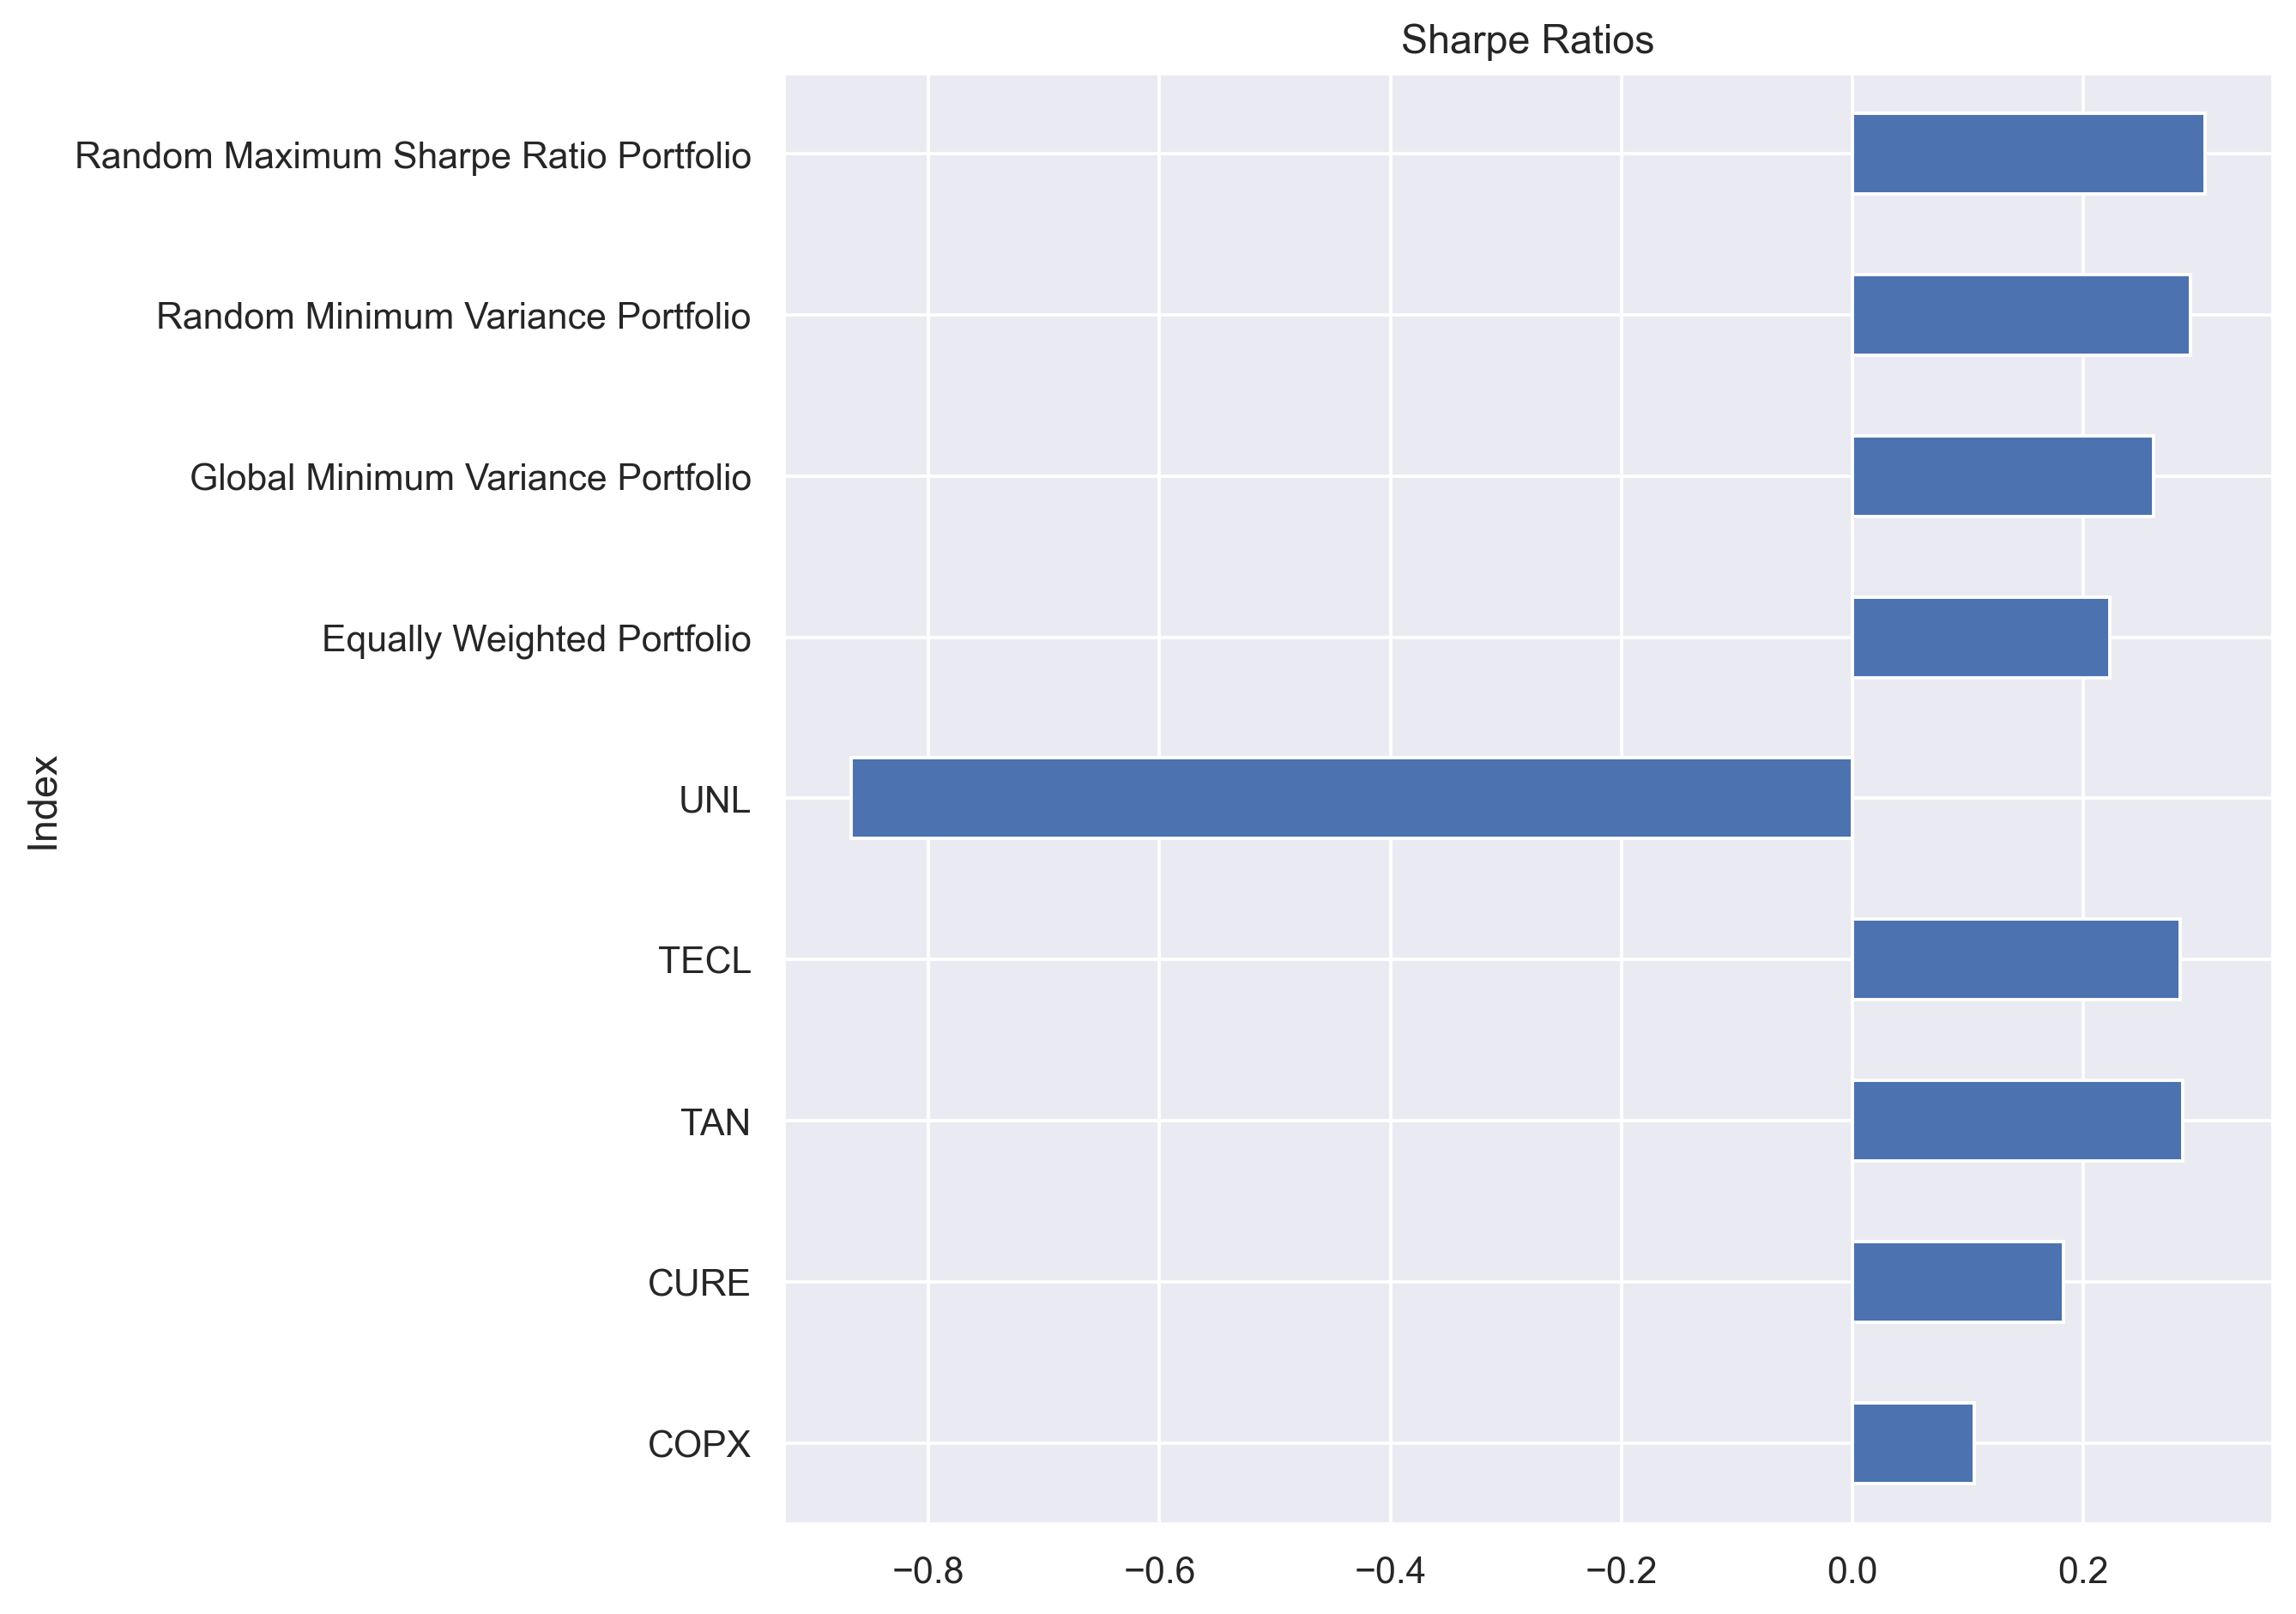

In [109]:
annual_mean_var.set_index("Index")["Sharpe Ratio"].plot(
    kind="barh", title="Sharpe Ratios"
)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

 #### Treynor Measure

In [110]:
annual_mean_var.set_index("Index").sort_values(
    by="Treynor Ratio", ascending=False
).style.format(
    {
        "Expected Return": PERCENT,
        "Standard Deviation": PERCENT,
        "Geometric Mean": PERCENT,
    }
)

<AxesSubplot:title={'center':'Treynor Ratio'}, ylabel='Index'>

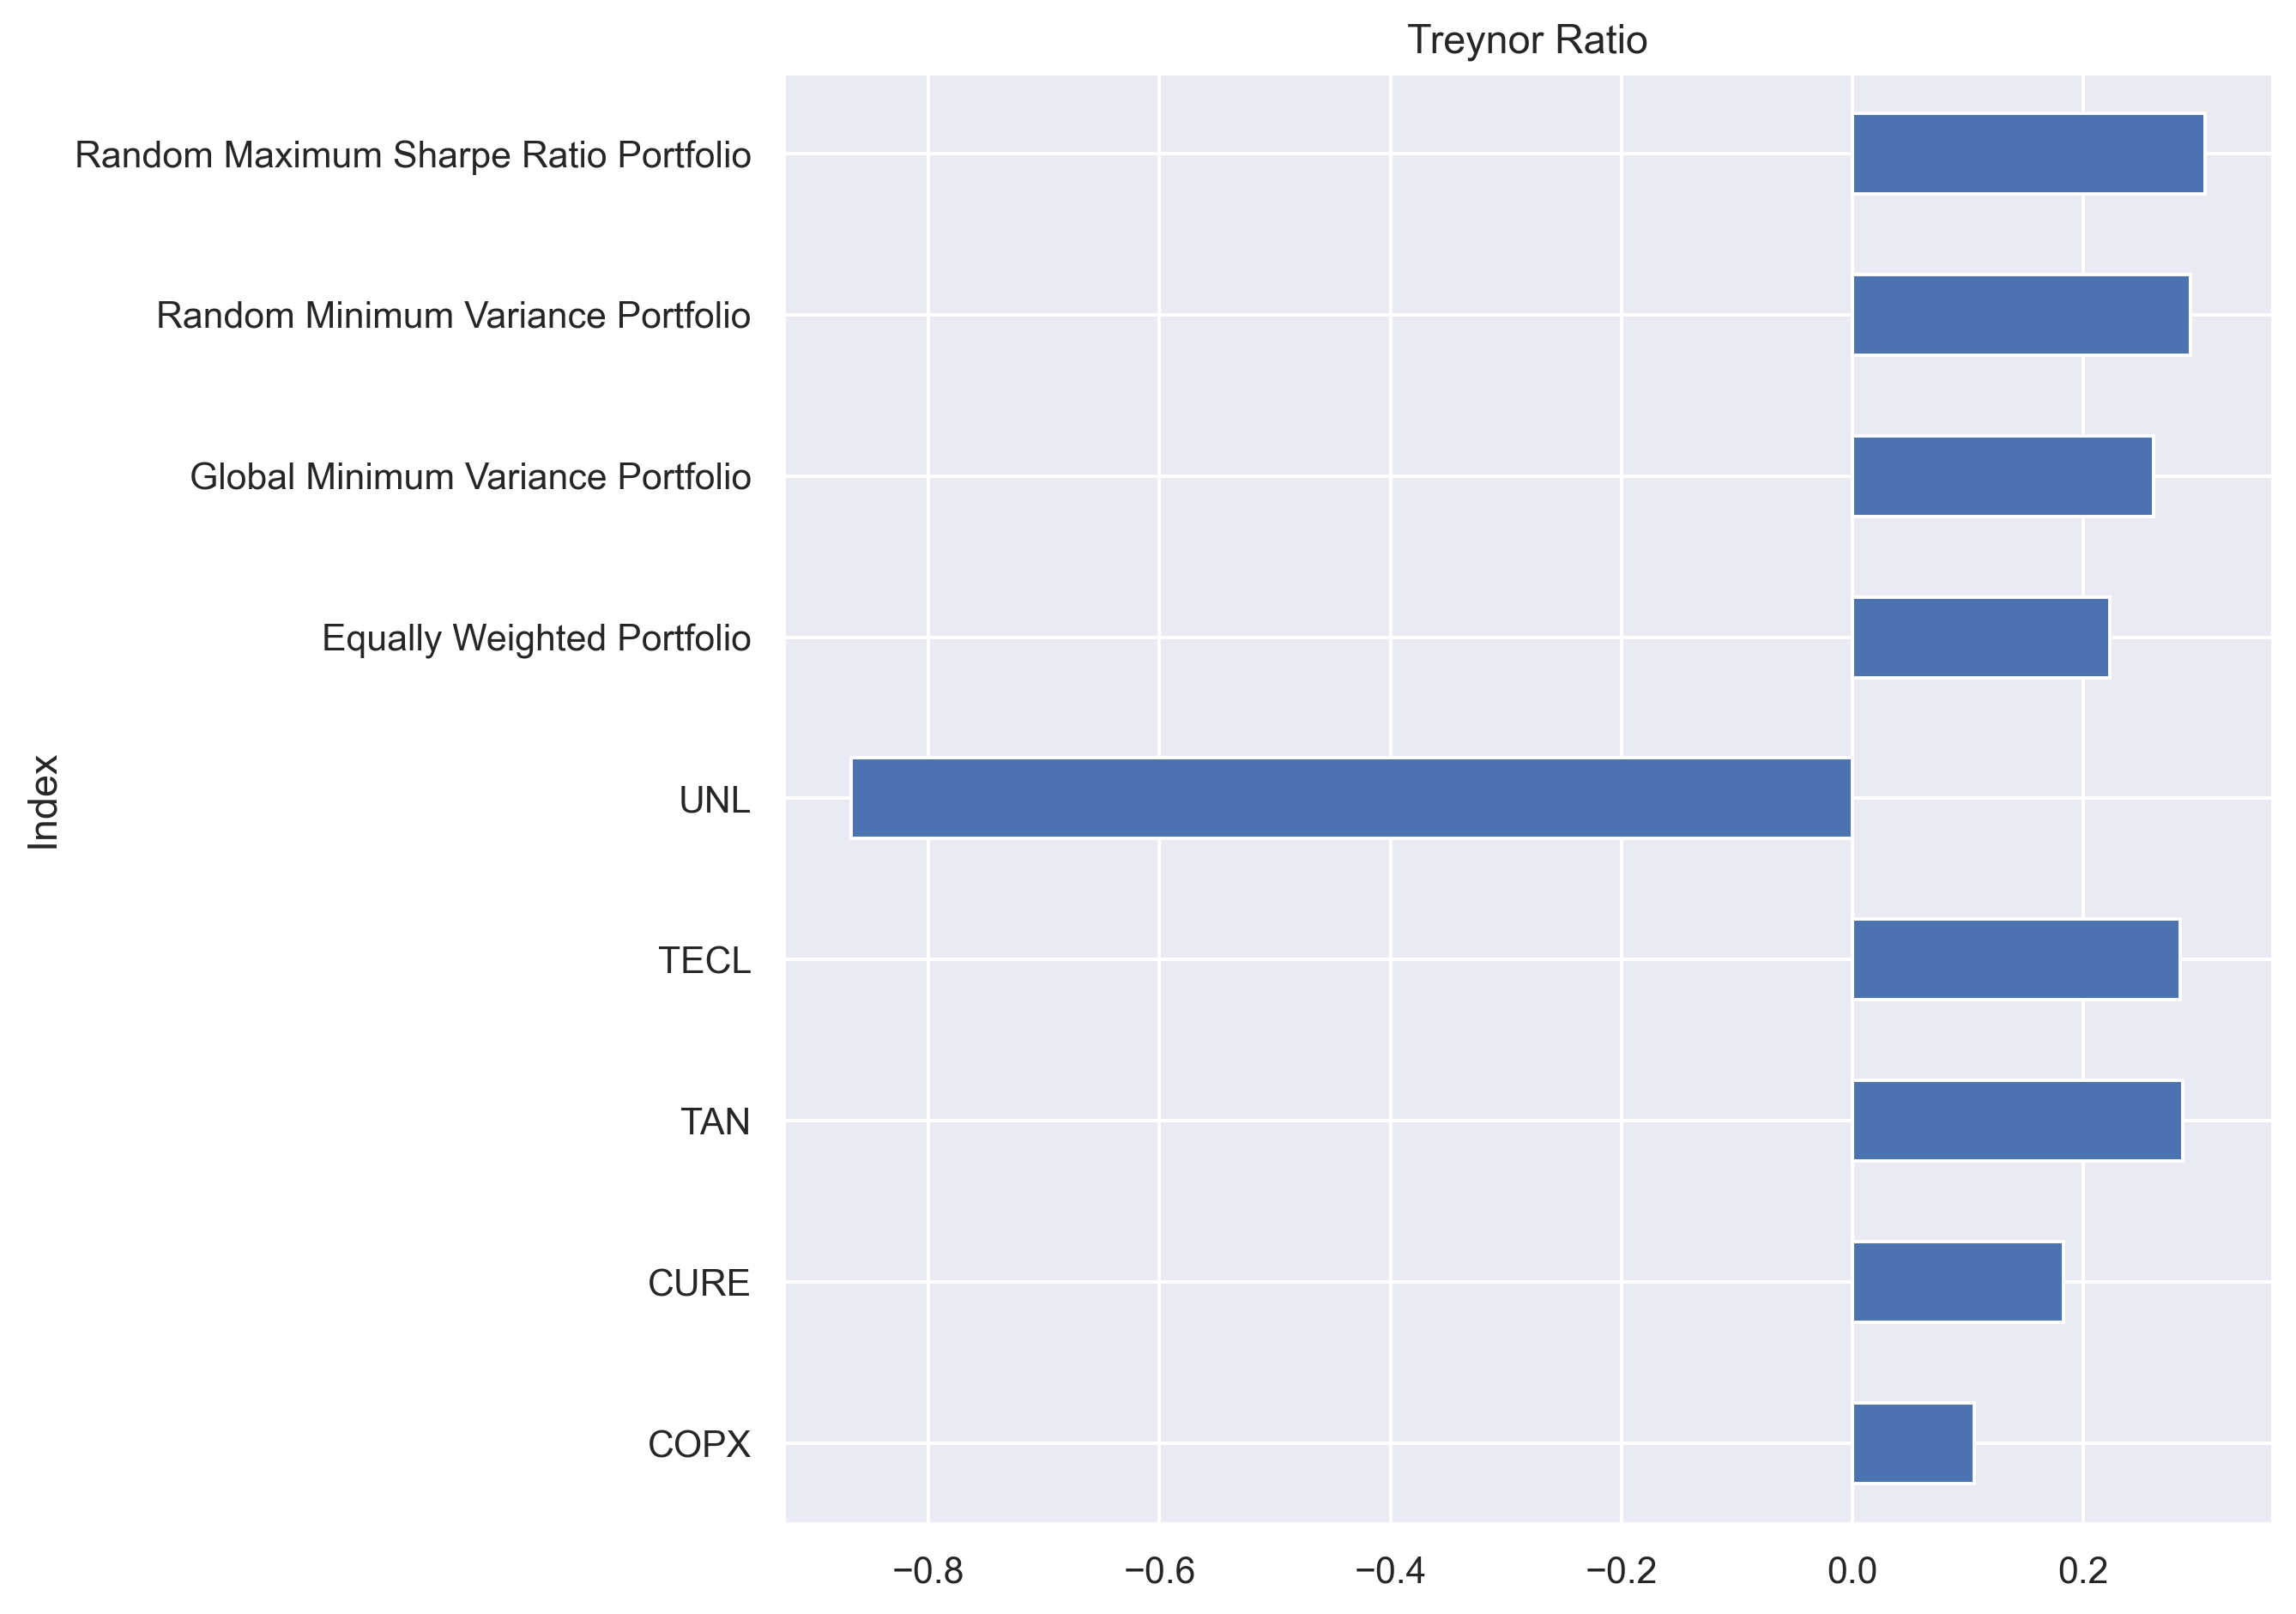

In [111]:
annual_mean_var.set_index("Index")["Treynor Ratio"].plot(
    kind="barh", title="Treynor Ratio"
)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

 #### Geometric Mean

In [112]:
annual_mean_var.set_index("Index").sort_values(
    by="Geometric Mean", ascending=False
).style.format(
    {
        "Expected Return": PERCENT,
        "Standard Deviation": PERCENT,
        "Geometric Mean": PERCENT,
    }
)

<AxesSubplot:title={'center':'Geometric Mean'}, ylabel='Index'>

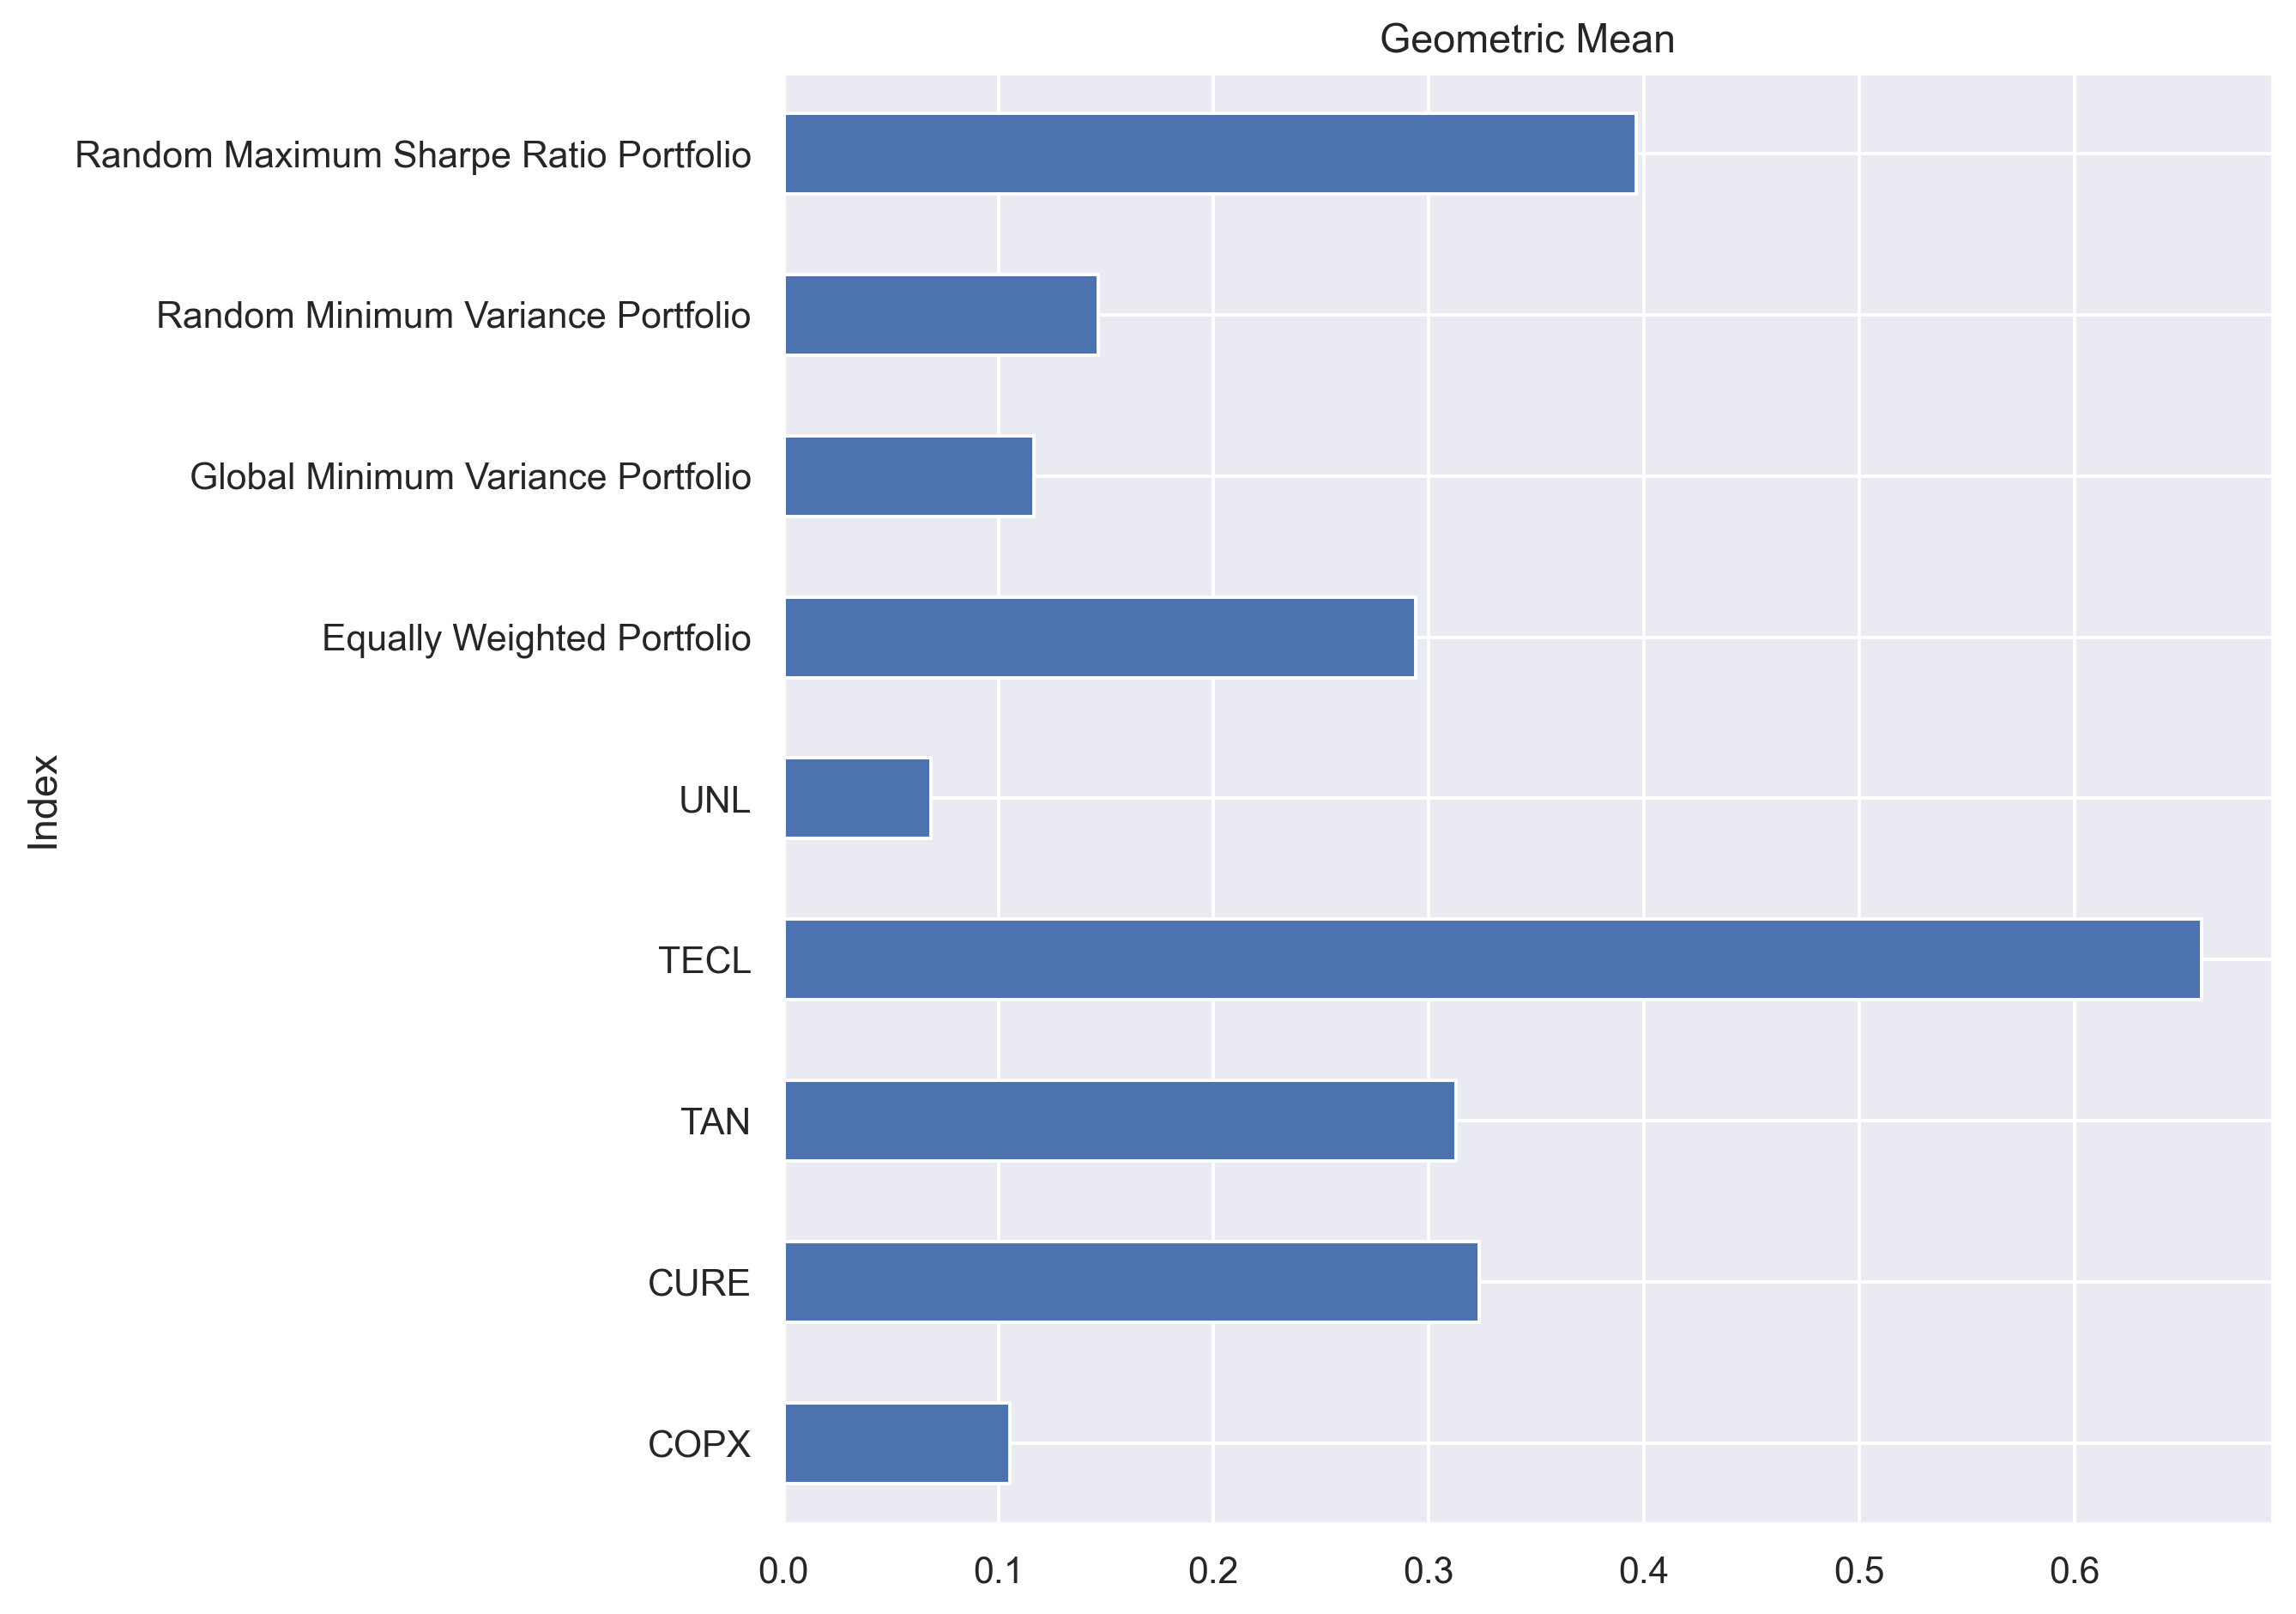

In [113]:
annual_mean_var.set_index("Index")["Geometric Mean"].plot(
    kind="barh", title="Geometric Mean"
)
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))